# SENSOR DATA ANALYSIS

## İrem TANRIVERDİ

In [329]:
# Import the necessary modules and libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm
import statistics
import missingno as msno
import statsmodels.imputation.mice as mice
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix ,matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from dtreeviz.trees import dtreeviz 
from sklearn import tree
import graphviz
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

## 1. Reading the data sets

There are 41 data sets, which include information about production process in a hypothetical chemical plant. In this chemical plant, various fluid products are derived from a fluid which consists of a set of compound substances. These compound substances have distinct densities and specific heat values. Source of the row materials, input temperature, pressure, speed and flow values, caustic ratio and cinh ratios, pH and iron values are provided in these data sets. 

**These data sets contain the production process values collected hourly from 2021-02-01 08:00:00 to 2021-05-04 19:06:00**

- Caustic is used to regulate the pH value of the liquid flowing in the equipment.
- Corrosion inhibitor (cinh) is used to prevent corrosion of the equipment.

Caustic and cinh values are taken every two hours. The new values are updated after half an hour.
For example, we checked the pH value at 8 o'clock, if it is not between 5.5 and 6.5, the new caustic value is updated at 8.30.

**Aim:**
- Keeping the pH value between 5.6-6.4.
- Keep the iron value under 1.

While reading the data sets, we specify the "date" column using the parameter **parse_dates** and "datetime index" using the parameter **index_col**.

In [330]:
# Data were measured at 1 minute intervals.

caustic= pd.read_csv("caustic.csv",parse_dates=['date'], index_col=['date'])
caustic.head()

,caustic
date,
2021-02-01 08:00:00,0.011096
2021-02-01 08:01:00,0.011096
2021-02-01 08:02:00,0.011096
2021-02-01 08:03:00,0.011096
2021-02-01 08:04:00,0.011096


In [331]:
# Data were measured at 1 minute intervals.

cinh= pd.read_csv("cinh.csv",parse_dates=['date'], index_col=['date'])
cinh.head()

,cinh
date,
2021-02-01 08:00:00,0.000813
2021-02-01 08:01:00,0.000813
2021-02-01 08:02:00,0.000813
2021-02-01 08:03:00,0.000813
2021-02-01 08:04:00,0.000813


In [332]:
# Data were measured at 2 hour intervals.

fe_lab= pd.read_csv("fe_lab.csv",parse_dates=['date'], index_col=['date'])
fe_lab.head()

,fe_lab
date,
2021-02-01 08:00:00,1.270
2021-02-01 10:00:00,1.116
2021-02-01 12:00:00,1.006
2021-02-01 14:00:00,0.914
2021-02-01 16:00:00,0.870


In [333]:
# Data were measured at 2 hour intervals.

ph_lab= pd.read_csv("ph_lab.csv",parse_dates=['date'], index_col=['date'])
ph_lab.head()

,ph_lab
date,
2021-02-01 08:00:00,8.36
2021-02-01 10:00:00,7.73
2021-02-01 12:00:00,7.32
2021-02-01 14:00:00,6.99
2021-02-01 16:00:00,6.66



## All this data sets will need to be merged later. Besides, column names in a data set cannot be the same. Thus,  the column names of the data sets had been changed from the beginning.


In [334]:
# Data were measured at 1 minute intervals.

input_f= pd.read_csv("input_f.csv",parse_dates=['date'], index_col=['date'])
input_f = input_f.rename(columns={'date': 'date', 'flow': 'input_flow'})
input_f.head()

,input_flow
date,
2021-02-01 08:00:00,149819.0
2021-02-01 08:01:00,150503.0
2021-02-01 08:02:00,149128.0
2021-02-01 08:03:00,149747.0
2021-02-01 08:04:00,150382.0


In [335]:
# Data were measured at 1 minute intervals.

input_p= pd.read_csv("input_p.csv",parse_dates=['date'], index_col=['date'])
input_p = input_p.rename(columns={'date': 'date', 'pressure': 'input_pressure'})
input_p.head()

,input_pressure
date,
2021-02-01 08:00:00,9631200.0
2021-02-01 08:01:00,9633100.0
2021-02-01 08:02:00,9633100.0
2021-02-01 08:03:00,9634900.0
2021-02-01 08:04:00,9634500.0


In [336]:
# Data were measured at 1 minute intervals.

input_t= pd.read_csv("input_t.csv",parse_dates=['date'], index_col=['date'])
input_t = input_t.rename(columns={'date': 'date', 'temperature': 'input_temperature'})
input_t.head()

,input_temperature
date,
2021-02-01 08:00:00,10.2
2021-02-01 08:01:00,10.4
2021-02-01 08:02:00,10.6
2021-02-01 08:03:00,11.1
2021-02-01 08:04:00,10.0


In [337]:
# Data were measured at 1 minute intervals.

input_v= pd.read_csv("input_v.csv",parse_dates=['date'], index_col=['date'])
input_v = input_v.rename(columns={'date': 'date', 'velocity': 'input_velocity'})
input_v.head()

,input_velocity
date,
2021-02-01 08:00:00,14.98
2021-02-01 08:01:00,15.05
2021-02-01 08:02:00,14.86
2021-02-01 08:03:00,14.96
2021-02-01 08:04:00,15.05


In [338]:
# Data were measured at 1 minute intervals.

source= pd.read_csv("source.csv",parse_dates=['date'], index_col=['date'])

In [339]:
# Data were measured at 1 minute intervals.

x1_ci_f= pd.read_csv("x1_ci_f.csv",parse_dates=['date'], index_col=['date'])
x1_ci_p= pd.read_csv("x1_ci_p.csv",parse_dates=['date'], index_col=['date'])
x1_ci_t= pd.read_csv("x1_ci_t.csv",parse_dates=['date'], index_col=['date'])
x1_ci_v= pd.read_csv("x1_ci_v.csv",parse_dates=['date'], index_col=['date'])


x1_co_f= pd.read_csv("x1_co_f.csv",parse_dates=['date'], index_col=['date'])
x1_co_p= pd.read_csv("x1_co_p.csv",parse_dates=['date'], index_col=['date'])
x1_co_t= pd.read_csv("x1_co_t.csv",parse_dates=['date'], index_col=['date'])
x1_co_v= pd.read_csv("x1_co_v.csv",parse_dates=['date'], index_col=['date'])


x1_hi_f= pd.read_csv("x1_hi_f.csv",parse_dates=['date'], index_col=['date'])
x1_hi_p= pd.read_csv("x1_hi_p.csv",parse_dates=['date'], index_col=['date'])
x1_hi_t= pd.read_csv("x1_hi_t.csv",parse_dates=['date'], index_col=['date'])
x1_hi_v= pd.read_csv("x1_hi_v.csv",parse_dates=['date'], index_col=['date'])


x1_ho_f= pd.read_csv("x1_ho_f.csv",parse_dates=['date'], index_col=['date'])
x1_ho_p= pd.read_csv("x1_ho_p.csv",parse_dates=['date'], index_col=['date'])
x1_ho_t= pd.read_csv("x1_ho_t.csv",parse_dates=['date'], index_col=['date'])
x1_ho_v= pd.read_csv("x1_ho_v.csv",parse_dates=['date'], index_col=['date'])

In [340]:
# change the column names of each X1 data sets.

x1_ci_f = x1_ci_f.rename(columns={'date': 'date', 'flow': 'X1_coldIn_flow'})
x1_ci_p = x1_ci_p.rename(columns={'date': 'date', 'pressure': 'X1_coldIn_pressure'})
x1_ci_t = x1_ci_t.rename(columns={'date': 'date', 'temperature': 'X1_coldIn_temperature'})
x1_ci_v = x1_ci_v.rename(columns={'date': 'date', 'velocity': 'X1_coldIn_velocity'})


x1_co_f = x1_co_f.rename(columns={'date': 'date', 'flow': 'X1_coldOut_flow'})
x1_co_p = x1_co_p.rename(columns={'date': 'date', 'pressure': 'X1_coldOut_pressure'})
x1_co_t = x1_co_t.rename(columns={'date': 'date', 'temperature': 'X1_coldOut_temperature'})
x1_co_v = x1_co_v.rename(columns={'date': 'date', 'velocity': 'X1_coldOut_velocity'})


x1_hi_f = x1_hi_f.rename(columns={'date': 'date', 'flow': 'X1_hotIn_flow'})
x1_hi_p = x1_hi_p.rename(columns={'date': 'date', 'pressure': 'X1_hotIn_pressure'})
x1_hi_t = x1_hi_t.rename(columns={'date': 'date', 'temperature': 'X1_hotIn_temperature'})
x1_hi_v = x1_hi_v.rename(columns={'date': 'date', 'velocity': 'X1_hotIn_velocity'})


x1_ho_f = x1_ho_f.rename(columns={'date': 'date', 'flow': 'X1_hotOut_flow'})
x1_ho_p = x1_ho_p.rename(columns={'date': 'date', 'pressure': 'X1_hotOut_pressure'})
x1_ho_t = x1_ho_t.rename(columns={'date': 'date', 'temperature': 'X1_hotOut_temperature'})
x1_ho_v = x1_ho_v.rename(columns={'date': 'date', 'velocity': 'X1_hotOut_velocity'})

In [341]:
# Data were measured at 1 minute intervals.

x2_ci_f= pd.read_csv("x2_ci_f.csv",parse_dates=['date'], index_col=['date'])
x2_ci_p= pd.read_csv("x2_ci_p.csv",parse_dates=['date'], index_col=['date'])
x2_ci_t= pd.read_csv("x2_ci_t.csv",parse_dates=['date'], index_col=['date'])
x2_ci_v= pd.read_csv("x2_ci_v.csv",parse_dates=['date'], index_col=['date'])


x2_co_f= pd.read_csv("x2_co_f.csv",parse_dates=['date'], index_col=['date'])
x2_co_p= pd.read_csv("x2_co_p.csv",parse_dates=['date'], index_col=['date'])
x2_co_t= pd.read_csv("x2_co_t.csv",parse_dates=['date'], index_col=['date'])
x2_co_v= pd.read_csv("x2_co_v.csv",parse_dates=['date'], index_col=['date'])


x2_hi_f= pd.read_csv("x2_hi_f.csv",parse_dates=['date'], index_col=['date'])
x2_hi_p= pd.read_csv("x2_hi_p.csv",parse_dates=['date'], index_col=['date'])
x2_hi_t= pd.read_csv("x2_hi_t.csv",parse_dates=['date'], index_col=['date'])
x2_hi_v= pd.read_csv("x2_hi_v.csv",parse_dates=['date'], index_col=['date'])


x2_ho_f= pd.read_csv("x2_ho_f.csv",parse_dates=['date'], index_col=['date'])
x2_ho_p= pd.read_csv("x2_ho_p.csv",parse_dates=['date'], index_col=['date'])
x2_ho_t= pd.read_csv("x2_ho_t.csv",parse_dates=['date'], index_col=['date'])
x2_ho_v= pd.read_csv("x2_ho_v.csv",parse_dates=['date'], index_col=['date'])

In [342]:
# change the column names of each X2 data sets.

x2_ci_f = x2_ci_f.rename(columns={'date': 'date', 'flow': 'X2_coldIn_flow'})
x2_ci_p = x2_ci_p.rename(columns={'date': 'date', 'pressure': 'X2_coldIn_pressure'})
x2_ci_t = x2_ci_t.rename(columns={'date': 'date', 'temperature': 'X2_coldIn_temperature'})
x2_ci_v = x2_ci_v.rename(columns={'date': 'date', 'velocity': 'X2_coldIn_velocity'})


x2_co_f = x2_co_f.rename(columns={'date': 'date', 'flow': 'X2_coldOut_flow'})
x2_co_p = x2_co_p.rename(columns={'date': 'date', 'pressure': 'X2_coldOut_pressure'})
x2_co_t = x2_co_t.rename(columns={'date': 'date', 'temperature': 'X2_coldOut_temperature'})
x2_co_v = x2_co_v.rename(columns={'date': 'date', 'velocity': 'X2_coldOut_velocity'})


x2_hi_f = x2_hi_f.rename(columns={'date': 'date', 'flow': 'X2_hotIn_flow'})
x2_hi_p = x2_hi_p.rename(columns={'date': 'date', 'pressure': 'X2_hotIn_pressure'})
x2_hi_t = x2_hi_t.rename(columns={'date': 'date', 'temperature': 'X2_hotIn_temperature'})
x2_hi_v = x2_hi_v.rename(columns={'date': 'date', 'velocity': 'X2_hotIn_velocity'})


x2_ho_f = x2_ho_f.rename(columns={'date': 'date', 'flow': 'X2_hotOut_flow'})
x2_ho_p = x2_ho_p.rename(columns={'date': 'date', 'pressure': 'X2_hotOut_pressure'})
x2_ho_t = x2_ho_t.rename(columns={'date': 'date', 'temperature': 'X2_hotOut_temperature'})
x2_ho_v = x2_ho_v.rename(columns={'date': 'date', 'velocity': 'X2_hotOut_velocity'})


All given data set had been imported and column names was changed so that the column names are not the same. Hence, all given data set can be merged now.


## 2. Merging the data sets

When the data needed come from multiple sources, it is essential to know how to aggregate them so that we lose as little information as possible and make pairings that make sense given the structure of the data. When we have datasets that represent the same set of observations, we combine such datasets horizontally. We can add more columns to it, keeping the rows of our dataset. In such cases, we have to check if the order of the observations is the same.

The first step when looking to combine datasets is to look for the primary key of the data sets. The primary key is the column or set of columns that uniquely identifies each observation in the data sets. In this study **"date"** column is the primary key of the data sets.

Now we have to decide what type of join (left, inside, right) we should provide. "fe_lab" and "ph_lav" data sets only includes dates with 2 hour time interval. If we present inner join all the other data set taken as dates with 2 hour time interval. This causes a lot of information loss. Thus, we should provide "left join". In this manner, we can combine data according to their "date" without any loss of information. The "fe_lab" and "ph_lav" datasets contain only dates with a 2-hour timeframe. NA value will be assigned to the time intervals in between.

Let provide left join and combine the all the data sets.

In [343]:
overall_data = caustic.merge(cinh, on='date', how='left', indicator=False)
overall_data = overall_data.merge(input_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(input_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(input_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(input_v, on='date', how='left', indicator=False)
overall_data = overall_data.merge(source, on='date', how='left', indicator=False)

overall_data = overall_data.merge(x1_ci_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ci_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ci_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ci_v, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_hi_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_hi_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_hi_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_hi_v, on='date', how='left', indicator=False)



overall_data = overall_data.merge(x2_ci_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ci_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ci_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ci_v, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_hi_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_hi_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_hi_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_hi_v, on='date', how='left', indicator=False)


overall_data = overall_data.merge(x1_co_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_co_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_co_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_co_v, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ho_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ho_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ho_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x1_ho_v, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_co_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_co_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_co_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_co_v, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ho_f, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ho_p, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ho_t, on='date', how='left', indicator=False)
overall_data = overall_data.merge(x2_ho_v, on='date', how='left', indicator=False)

overall_data = overall_data.merge(ph_lab, on='date', how='left', indicator=False)
overall_data = overall_data.merge(fe_lab, on='date', how='left', indicator=False)


In [344]:
overall_data.head()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,source,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,0.011096,0.000813,149819.0,9631200.0,10.2,14.98,A,150111.0,9635600.0,10.1,...,150056.0,9643400.0,101.4,15.07,75188.0,NaN,-40.0,22.53,8.36,1.27
2021-02-01 08:01:00,0.011096,0.000813,150503.0,9633100.0,10.4,15.05,A,149390.0,9635200.0,10.6,...,149505.0,9642600.0,NaN,15.02,74794.0,9642800.0,138.4,22.44,NaN,NaN
2021-02-01 08:02:00,0.011096,0.000813,149128.0,9633100.0,10.6,14.86,A,149616.0,9633400.0,10.7,...,150074.0,9638500.0,101.0,15.09,74926.0,9646500.0,131.6,22.48,NaN,NaN
2021-02-01 08:03:00,0.011096,0.000813,149747.0,9634900.0,11.1,14.96,A,149729.0,9635500.0,10.2,...,151585.0,9637500.0,101.6,15.27,75758.0,9644200.0,132.1,22.72,NaN,NaN
2021-02-01 08:04:00,0.011096,0.000813,150382.0,9634500.0,10.0,15.05,A,149507.0,9637300.0,10.0,...,149705.0,9642300.0,101.4,15.08,74453.0,9646900.0,130.2,22.33,NaN,NaN


The combined version of the dataset is shown above. There is no problem with the dataset. Column names are different, and no information is lost. In overall data set, there is 133147 observations and 41 features.

In [345]:
# Display number of rows, columns, etc
overall_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133147 entries, 2021-02-01 08:00:00 to 2021-05-04 19:06:00
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   caustic                 133147 non-null  float64
 1   cinh                    133147 non-null  float64
 2   input_flow              131823 non-null  float64
 3   input_pressure          129196 non-null  float64
 4   input_temperature       126665 non-null  float64
 5   input_velocity          127907 non-null  float64
 6   source                  133147 non-null  object 
 7   X1_coldIn_flow          131820 non-null  float64
 8   X1_coldIn_pressure      129198 non-null  float64
 9   X1_coldIn_temperature   126679 non-null  float64
 10  X1_coldIn_velocity      127897 non-null  float64
 11  X1_hotIn_flow           131822 non-null  float64
 12  X1_hotIn_pressure       129195 non-null  float64
 13  X1_hotIn_temperature    126634 non-null 

## Time Allignment

In [346]:
inputs =overall_data.iloc[range(0,133140,30), range(0,7,1)]
date = inputs.index
date = pd.DataFrame(date)

x1_in= overall_data.iloc[range(10,133140,30), range(7,15,1)]
x1_out = overall_data.iloc[range(14,133140,30), range(23,31,1)]
x2_in = overall_data.iloc[range(15,133140,30), range(15,23,1)]
x2_out= overall_data.iloc[range(19,133140,30), range(31,39,1)]
ph_fe= overall_data.iloc[range(0,133140,30), range(39,41,1)]

In [347]:
x1_in.reset_index(drop=True, inplace=True)
x1_out.reset_index(drop=True, inplace=True)

x2_in.reset_index(drop=True, inplace=True)
x2_out.reset_index(drop=True, inplace=True)


ph_fe.reset_index(drop=True, inplace=True)
inputs.reset_index(drop=True, inplace=True)

In [348]:
alligned_data = pd.concat([date,inputs, x1_in, x1_out, x2_in, x2_out, ph_fe], axis=1)
alligned_data= alligned_data.set_index("date") 

In [840]:
alligned_data.head()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,source,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,0.011096,0.000813,149819.0,9631200.0,10.2,14.98,A,149819.0,9631600.0,10.1,...,149848.0,9630400.0,98.9,15.08,73062.0,9647300.0,131.9,999.00,8.36,1.270
2021-02-01 08:30:00,0.009997,0.000855,149728.0,9634800.0,10.8,14.98,A,149707.0,9632600.0,10.8,...,149699.0,0.0,100.3,15.01,73238.0,9645200.0,130.3,21.95,NaN,NaN
2021-02-01 09:00:00,0.009997,0.000855,149351.0,9613100.0,11.0,14.94,A,149345.0,9612800.0,11.0,...,149351.0,9611100.0,97.8,15.00,69922.0,9645200.0,130.9,20.95,NaN,NaN
2021-02-01 09:30:00,0.009997,0.000855,150285.0,9611400.0,-40.0,15.03,A,150260.0,9608600.0,11.4,...,150278.0,9611600.0,99.0,NaN,70648.0,9643900.0,127.4,21.18,NaN,NaN
2021-02-01 10:00:00,0.009997,0.000855,149260.0,9611800.0,12.0,14.89,A,149234.0,9610500.0,12.2,...,149276.0,9610700.0,100.1,15.04,70707.0,9643000.0,126.2,21.20,7.73,1.116


## 3. Description of the data set

In [136]:
# Summarize the data
alligned_data.describe()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
count,4438.000000,4438.000000,4389.000000,4.312000e+03,4216.000000,4252.000000,4395.000000,4.297000e+03,4214.000000,4254.000000,...,4388.000000,4.314000e+03,4226.000000,4273.000000,4401.000000,4.307000e+03,4244.000000,4242.000000,1110.000000,1110.000000
mean,0.012112,0.000841,149273.576669,9.593287e+06,12.514160,29.347632,149375.847099,9.592457e+06,12.455339,26.714050,...,149409.694166,9.627331e+06,112.150710,28.660101,61407.119064,9.554081e+06,138.060627,35.138428,6.031730,0.887247
std,0.005017,0.000069,10398.100252,1.042547e+06,9.068318,117.965803,9630.872311,1.044263e+06,9.230347,106.047127,...,9370.623567,8.748746e+05,28.519392,114.829539,12638.321124,9.367460e+05,31.780058,126.718282,0.679517,0.090169
min,0.005306,0.000657,0.000000,0.000000e+00,-40.000000,14.660000,0.000000,0.000000e+00,-40.000000,14.760000,...,0.000000,0.000000e+00,-40.000000,14.720000,0.000000,0.000000e+00,-40.000000,13.740000,3.190000,0.427000
25%,0.007593,0.000791,149294.000000,9.510200e+06,10.400000,14.930000,149299.500000,9.509900e+06,10.500000,15.080000,...,149296.750000,9.510400e+06,103.100000,15.000000,51633.000000,9.644500e+06,131.000000,15.502500,5.760000,0.848000
50%,0.011374,0.000840,149994.000000,9.766300e+06,13.600000,15.000000,150001.000000,9.765000e+06,13.600000,15.150000,...,149993.500000,9.766300e+06,109.750000,15.080000,58289.000000,9.645900e+06,136.600000,17.920000,6.080000,0.884000
75%,0.016970,0.000887,150659.000000,9.839400e+06,16.900000,15.070000,150665.000000,9.839500e+06,16.900000,15.220000,...,150664.250000,9.840300e+06,132.000000,15.150000,70409.000000,9.647300e+06,157.700000,21.240000,6.250000,0.921000
max,0.019974,0.001072,153508.000000,9.978300e+06,22.400000,999.000000,153529.000000,9.980100e+06,22.500000,999.000000,...,153184.000000,9.977900e+06,145.500000,999.000000,92480.000000,9.652700e+06,170.800000,999.000000,9.840000,1.494000


In the table above, 5-number summaries and quartile values of numeric variables are observed.

It is observed that;

- Minimum caustic value to regulate the pH value of the liquid flowing in the equipment is 0.0053 while maximum caustic value to regulate the pH value of the liquid flowing in the equipment is 0.02. Besides, minimum corrosion inhibitor value to prevent corrosion of the equipment is 0.0008 while maximum corrosion inhibitor value to prevent corrosion of the equipment is 0.00107. Minimum pH value of the liquid flowing in the equipment is 3.19 while maximum pH value of the liquid flowing in the equipment 9.84. Moreover, minimum iron value is 0.43, while maximum iron value is 1.49.

- When we look at the range of the range of the input temperature, pressure, flow and velocity, they are same with the cold in and cold out values.

- On average, pH value of the liquid flowing in the equipment is 6.03 which is between the range (5.6-6.4). Mean pH value in the data is to the desired extent.

- On average, iron value is 0.88 which is smaller than 1. Mean iron value in the data is to the desired extent. 

### We have hourly data and it can be complicated to visualize. Therefore, the data was made daily and average values for the production process were taken for each day.



In [137]:
# Resample to daily mean values for the production process and save as new dataframe

daily_data = alligned_data.resample('D').mean()
daily_data.head()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01,0.007510,0.000914,149879.687500,9.255327e+06,11.932258,46.722258,149907.838710,9.574600e+06,11.887097,47.926000,...,145006.000000,8.975109e+06,94.848387,15.070345,69497.000000,9.645742e+06,123.351613,52.372903,6.961250,0.956375
2021-02-02,0.005927,0.000899,149780.170213,9.552472e+06,8.376596,14.980222,149814.354167,9.136987e+06,7.334043,15.132979,...,149821.872340,9.551908e+06,95.636957,57.832391,68672.063830,9.235481e+06,122.006522,84.416304,6.097500,0.838250
2021-02-03,0.005792,0.000899,150024.191489,9.348257e+06,10.386047,15.003261,149985.062500,9.551096e+06,9.547826,15.146042,...,149984.458333,9.351829e+06,88.669565,36.456957,70218.489362,9.645811e+06,124.006667,42.801333,6.119167,0.840250
2021-02-04,0.005775,0.000867,149783.062500,9.592685e+06,7.347727,14.978222,149786.979167,9.383169e+06,4.575556,58.861556,...,149797.382979,9.592175e+06,105.804255,36.444348,72129.541667,9.646009e+06,131.522222,21.566818,5.696667,0.798083
2021-02-05,0.010818,0.000754,150010.375000,9.821523e+06,10.745652,15.000870,150014.829787,9.612553e+06,12.026667,15.155652,...,150011.583333,9.821785e+06,125.432609,15.075106,88172.229167,9.440630e+06,159.095455,47.632391,5.635000,0.928333


In [492]:
# Resample to hourly mean values for the production process and save as new dataframe

hourly_data = alligned_data.resample('H').mean()
hourly_data.head()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,0.010547,0.000834,149773.5,9633000.0,10.50,14.980,149763.0,9632100.0,10.45,15.110,...,149773.5,4815200.0,99.60,15.045,73150.0,9646250.0,131.10,510.475,8.36,1.270
2021-02-01 09:00:00,0.009997,0.000855,149818.0,9612250.0,-14.50,14.985,149802.5,9610700.0,11.20,15.060,...,149814.5,9611350.0,98.40,15.000,70285.0,9644550.0,129.15,21.065,NaN,NaN
2021-02-01 10:00:00,0.009502,0.000877,149772.5,9604450.0,11.95,14.950,149734.0,9603350.0,12.05,15.105,...,149754.5,9604350.0,99.15,15.075,70392.5,9644700.0,127.55,21.115,7.73,1.116
2021-02-01 11:00:00,0.009006,0.000898,148185.0,9598700.0,12.00,14.820,148188.5,9596900.0,12.00,14.970,...,73584.5,9599550.0,97.45,14.790,68826.0,9646600.0,130.05,20.650,NaN,NaN
2021-02-01 12:00:00,0.008559,0.000921,151186.0,9574800.0,12.50,15.120,151192.0,9586350.0,12.45,15.200,...,151207.5,9586650.0,98.20,15.210,69970.5,9644250.0,126.90,20.970,7.32,1.006


In [138]:
daily_data.describe()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
count,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,...,93.000000,9.300000e+01,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000
mean,0.012085,0.000842,149280.740169,9.592518e+06,12.526445,29.340728,149379.111345,9.592487e+06,12.471755,26.825192,...,149386.118778,9.625227e+06,112.096622,28.824723,61402.431515,9.554028e+06,138.017976,35.398647,6.035291,0.887460
std,0.004914,0.000062,1467.034219,2.266332e+05,2.716891,16.833483,1337.951942,2.299747e+05,2.917733,14.528453,...,1402.277790,2.135112e+05,13.047585,16.404416,11092.012047,1.452634e+05,13.225219,20.212051,0.445490,0.052403
min,0.005388,0.000711,143840.354167,8.955910e+06,6.453191,14.974783,143616.595745,8.973538e+06,4.575556,15.106667,...,143702.291667,8.975109e+06,88.669565,15.036596,46802.695652,9.030538e+06,113.487234,14.397273,4.472500,0.736667
25%,0.007593,0.000791,149768.145833,9.485930e+06,10.711628,15.000000,149795.750000,9.485888e+06,10.784444,15.151277,...,149821.872340,9.504296e+06,101.375556,15.074444,51903.250000,9.440630e+06,128.275000,18.741957,5.745833,0.848000
50%,0.011374,0.000844,149947.733333,9.581836e+06,12.634783,15.040851,149955.625000,9.581625e+06,12.617021,15.170833,...,149960.425532,9.598627e+06,109.878261,15.115957,60323.829787,9.645742e+06,135.345238,34.951458,6.087500,0.886167
75%,0.016700,0.000886,150050.723404,9.789831e+06,14.595556,36.858667,150049.250000,9.795885e+06,14.820455,36.535870,...,150062.812500,9.818157e+06,125.432609,36.463478,69187.000000,9.645966e+06,149.862791,43.192000,6.260833,0.923250
max,0.019974,0.000981,150395.479167,9.935569e+06,18.567391,82.066818,150281.041667,9.941989e+06,18.513333,77.972766,...,150399.510638,9.941985e+06,138.542222,80.655111,88172.229167,9.646589e+06,159.545652,87.837907,7.194167,1.059250


As seen descriptive statistics for daily data set are exactly same with the descriptive statistics of hourly data set. Thus, we can use daily data for visualization.

### 3.1. Descriptives for pH and Iron values

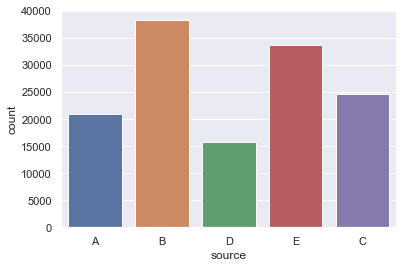

In [331]:
ax = sns.countplot(x="source", data=overall_data)

In above bar plot, frequencies of source of the raw materials. As seen, most frequent row material is 'B', while less frequent row material is 'D'.

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'pH value')]

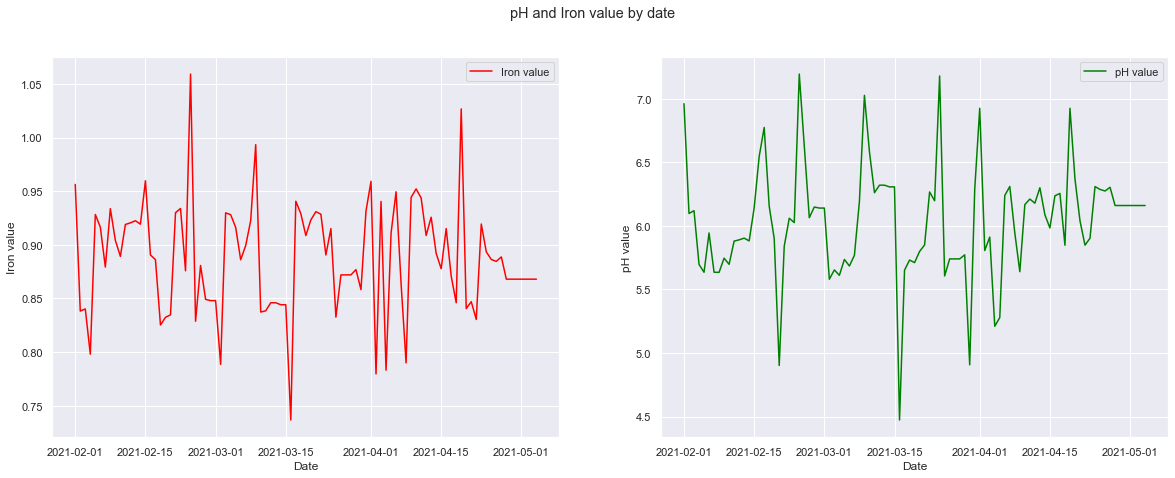

In [27]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

fig.suptitle('pH and Iron value by date')

ax= sns.lineplot(ax=axes[0],x=daily_data.index, y=daily_data.fe_lab, data=daily_data, color="red")
ax.legend(labels=["Iron value"])
ax.set(xlabel="Date", ylabel = "Iron value")

ax2= sns.lineplot(ax=axes[1],x=daily_data.index, y=daily_data.ph_lab, data=daily_data, color="green")
ax2.legend(labels=["pH value"])
ax2.set(xlabel="Date", ylabel = "pH value")

In above line graph, pH and iron values are shown daily. It was observed that daily pH and iron values showed the same pattern. Both pH and iron values shows dramatic changes day by day. The changes are so rapid and sharp. For example, in 2021-03-07 average pH value is approximately 7.1, then it drop to 4.5 in 2021-03-15.

<AxesSubplot:xlabel='source', ylabel='fe_lab'>

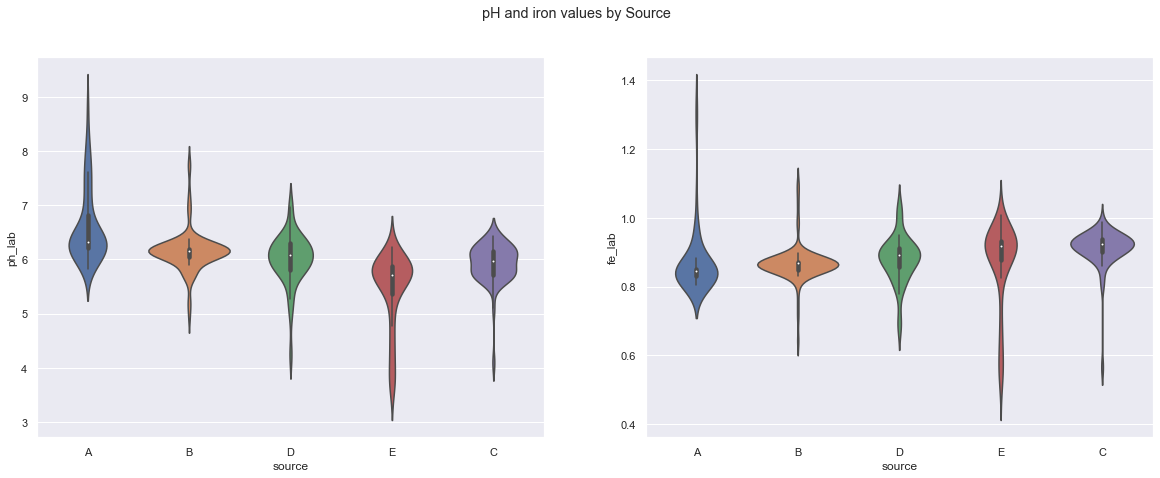

In [28]:
# pH and Iron data set
pH_fe_data = overall_data.dropna()

sns.set_theme(style="darkgrid")
fig5, axes = plt.subplots(1, 2, figsize=(20, 7))
fig5.suptitle('pH and iron values by Source')

sns.violinplot(ax=axes[0], x="source", y="ph_lab", data=pH_fe_data)
sns.violinplot(ax=axes[1], x="source", y="fe_lab", data=pH_fe_data)

In above plot, pH and iron values grouped by source of the materials have shown. Range of the pH value of the source A (5.5-10.5) is highest while source E is smallest (3.1-7.1). Mean pH value of sourse A is highest, while source E is smallest.

The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the pH of source B is highly concentrated around the its median.


Range of the iron value of the source A (0.7-1.6) is highest while source E is smallest (0.2-1.1). Mean iron value of sourse E is highest, while source A is smallest.

The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the iron of source B and C are highly concentrated around the its median.



In [805]:
for i in range(1, 133147, 1):
    if overall_data.ph_lab[i] <= 6.4 and overall_data.ph_lab[i]>= 5.6 and overall_data.fe_lab[i]<1:
        optimal_ph_fe =overall_data.index[i]
        print(optimal_ph_fe)

2021-02-01 20:00:00
2021-02-01 22:00:00
2021-02-02 00:00:00
2021-02-02 02:00:00
2021-02-02 04:00:00
2021-02-02 06:00:00
2021-02-02 08:00:00
2021-02-02 10:00:00
2021-02-02 12:00:00
2021-02-02 14:00:00
2021-02-02 16:00:00
2021-02-02 18:00:00
2021-02-02 20:00:00
2021-02-02 22:00:00
2021-02-03 00:00:00
2021-02-03 02:00:00
2021-02-03 04:00:00
2021-02-03 06:00:00
2021-02-03 08:00:00
2021-02-03 10:00:00
2021-02-03 12:00:00
2021-02-03 14:00:00
2021-02-03 16:00:00
2021-02-03 20:00:00
2021-02-03 22:00:00
2021-02-04 00:00:00
2021-02-04 02:00:00
2021-02-04 04:00:00
2021-02-04 06:00:00
2021-02-04 08:00:00
2021-02-04 10:00:00
2021-02-04 12:00:00
2021-02-04 14:00:00
2021-02-05 12:00:00
2021-02-05 14:00:00
2021-02-05 16:00:00
2021-02-05 18:00:00
2021-02-05 20:00:00
2021-02-05 22:00:00
2021-02-06 00:00:00
2021-02-06 02:00:00
2021-02-06 04:00:00
2021-02-06 06:00:00
2021-02-06 08:00:00
2021-02-06 10:00:00
2021-02-06 12:00:00
2021-02-06 14:00:00
2021-02-06 16:00:00
2021-02-06 18:00:00
2021-02-06 20:00:00


2021-03-15 02:00:00
2021-03-15 04:00:00
2021-03-15 06:00:00
2021-03-15 08:00:00
2021-03-15 10:00:00
2021-03-15 12:00:00
2021-03-15 14:00:00
2021-03-15 16:00:00
2021-03-15 18:00:00
2021-03-15 20:00:00
2021-03-15 22:00:00
2021-03-16 00:00:00
2021-03-16 22:00:00
2021-03-17 00:00:00
2021-03-17 02:00:00
2021-03-17 04:00:00
2021-03-17 06:00:00
2021-03-17 08:00:00
2021-03-17 10:00:00
2021-03-17 12:00:00
2021-03-17 14:00:00
2021-03-17 16:00:00
2021-03-17 18:00:00
2021-03-17 20:00:00
2021-03-17 22:00:00
2021-03-18 00:00:00
2021-03-18 02:00:00
2021-03-18 04:00:00
2021-03-18 08:00:00
2021-03-18 10:00:00
2021-03-18 12:00:00
2021-03-18 14:00:00
2021-03-18 16:00:00
2021-03-18 20:00:00
2021-03-18 22:00:00
2021-03-19 00:00:00
2021-03-19 02:00:00
2021-03-19 04:00:00
2021-03-19 06:00:00
2021-03-19 08:00:00
2021-03-19 10:00:00
2021-03-19 12:00:00
2021-03-19 14:00:00
2021-03-19 16:00:00
2021-03-19 18:00:00
2021-03-19 20:00:00
2021-03-19 22:00:00
2021-03-20 00:00:00
2021-03-20 02:00:00
2021-03-20 04:00:00


Above, we can see the days and hours when the optimal pH and iron values are reached.

### 3.2. Descriptives for Caustic and corrosion inhibitor injection ratios

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'cinh injection ratios')]

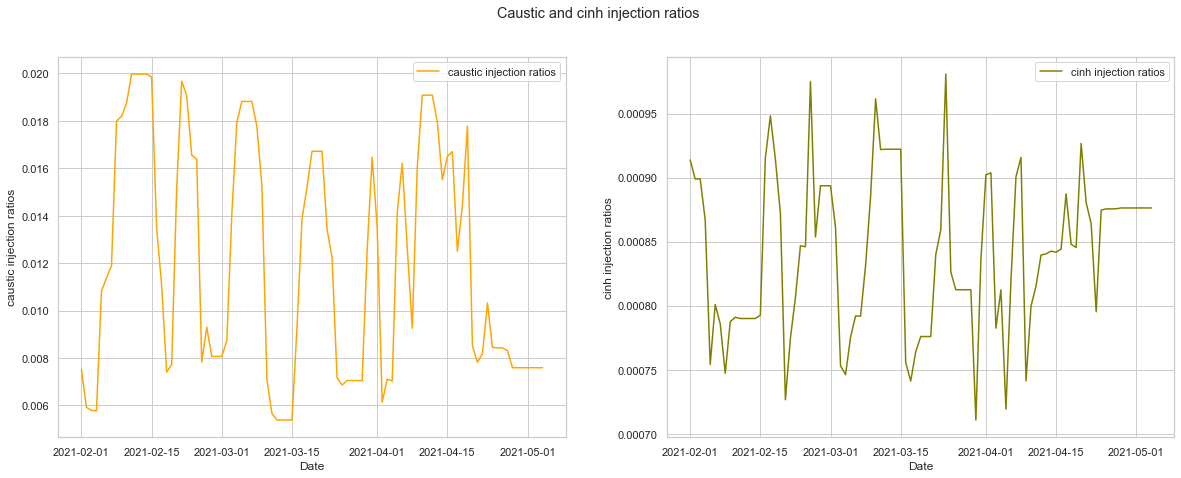

In [29]:
sns.set_theme(style="whitegrid")
fig2, axes = plt.subplots(1, 2, figsize=(20, 7))

fig2.suptitle('Caustic and cinh injection ratios')

ax= sns.lineplot(ax=axes[0],x=daily_data.index, y=daily_data.caustic, data=daily_data, color="orange")
ax.legend(labels=["caustic injection ratios"])
ax.set(xlabel="Date", ylabel = "caustic injection ratios")

ax2= sns.lineplot(ax=axes[1],x=daily_data.index, y=daily_data.cinh, data=daily_data, color="olive")
ax2.legend(labels=["cinh injection ratios"])
ax2.set(xlabel="Date", ylabel = "cinh injection ratios")

In the line plot above, it has been observed how the caustic and Caustic soda (referred to as "caustic") and corrosion inhibitor (referred to as "cinh") values change over time. Continuous increases and decreases are observed in both graphs. These constant changes are not very fast. Caustic and cinh values increase and decrease at opposite times.

<AxesSubplot:xlabel='source', ylabel='cinh'>

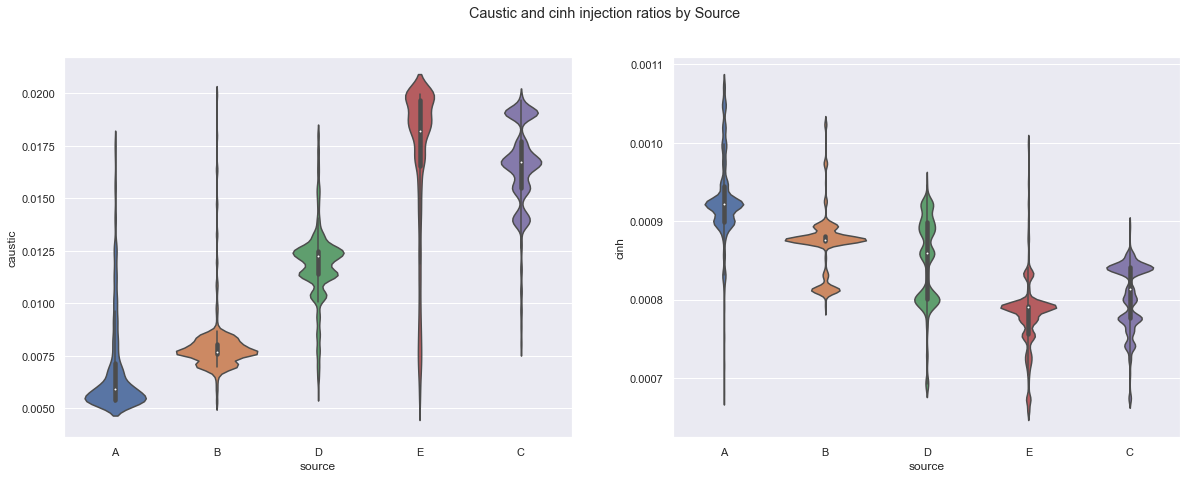

In [30]:
sns.set_theme(style="darkgrid")
fig5, axes = plt.subplots(1, 2, figsize=(20, 7))
fig5.suptitle('Caustic and cinh injection ratios by Source')

sns.violinplot(ax=axes[0], x="source", y="caustic", data=overall_data)
sns.violinplot(ax=axes[1], x="source", y="cinh", data=overall_data)

In above plot, caustic and corrosion inhibitor injection ratios grouped by source of the materials have shown.

Range of the caustic ratio of the source E (0.004-0.025) is highest while source A is smallest (0.004-0.018). Mean acustic ratio of sourse E is highest, while source A is smallest.
The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the caustic ratio of source B is highly concentrated around the its median.

Range of the cinh ratio of the source A  is highest while source E is smallest. Mean cinh ratio of sourse A is highest, while source E is smallest.
The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the cinh ratio of source B is highly concentrated around the its median.

### 3.3. Descriptives for temperature, pressure, flow and velocity

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'fluid speed – cm/s')]

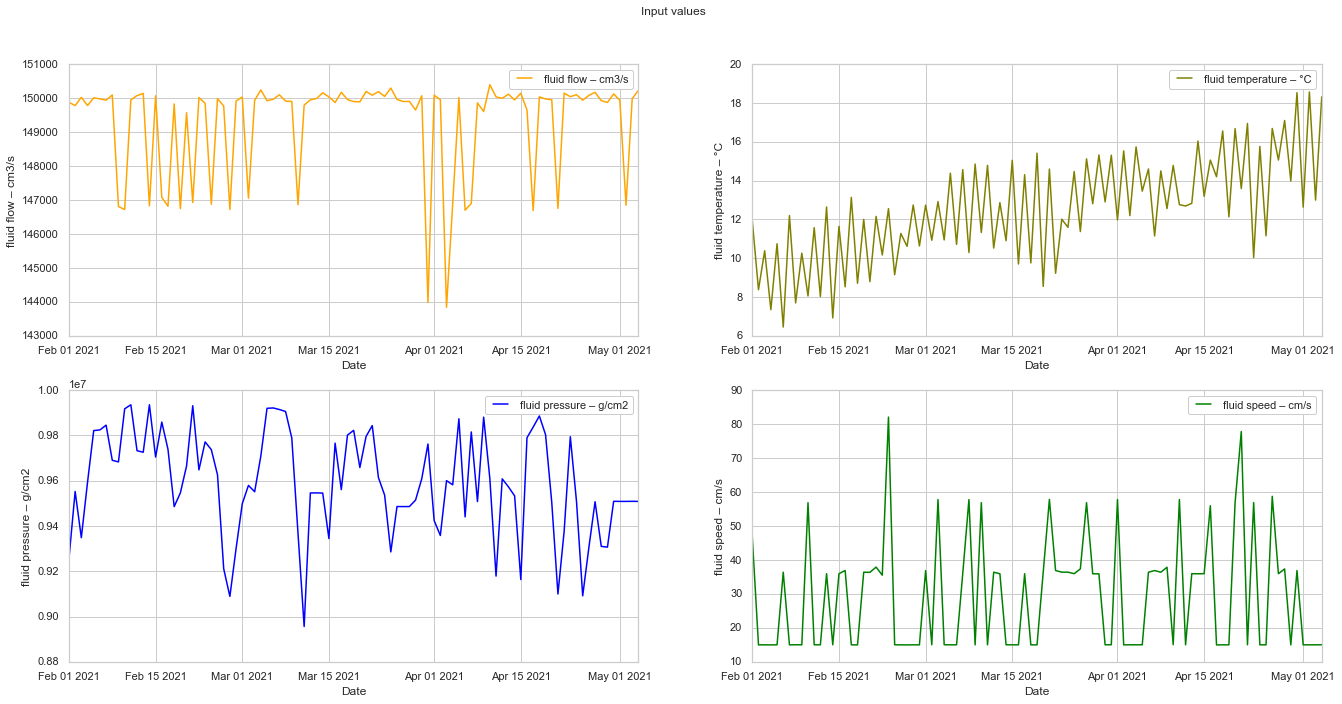

In [513]:
sns.set_theme(style="whitegrid")
fig3, axes = plt.subplots(2, 2, figsize=(20, 10))

fig3.suptitle('Input values')

ax= sns.lineplot(ax=axes[0,0],x=daily_data.index, y=daily_data.input_flow, data=daily_data, color="orange")
ax.legend(labels=["fluid flow – cm3/s"])
ax.set(xlabel="Date", ylabel = "fluid flow – cm3/s")

ax2= sns.lineplot(ax=axes[0,1],x=daily_data.index, y=daily_data.input_temperature, data=daily_data, color="olive")
ax2.legend(labels=["fluid temperature – °C"])
ax2.set(xlabel="Date", ylabel = "fluid temperature – °C")

ax3= sns.lineplot(ax=axes[1,0],x=daily_data.index, y=daily_data.input_pressure, data=daily_data, color="blue")
ax3.legend(labels=["fluid pressure – g/cm2"])
ax3.set(xlabel="Date", ylabel = "fluid pressure – g/cm2")

ax4= sns.lineplot(ax=axes[1,1],x=daily_data.index, y=daily_data.input_velocity, data=daily_data, color="green")
ax4.legend(labels=["fluid speed – cm/s"])
ax4.set(xlabel="Date", ylabel = "fluid speed – cm/s")

Input temperature, pressure, velocity and flow values are shown in the graph above. Dramatic increases and decreases in input flow and velocity values have been observed day by day. In other words, input flow and velocity show rapid changes. Input pressure also shows increases and decreases, but these changes occur slowly, unlike flow and velocity. The input temperature is constantly increasing. The input temperature has seasonality.

Text(0.5, 1.0, 'Trend')

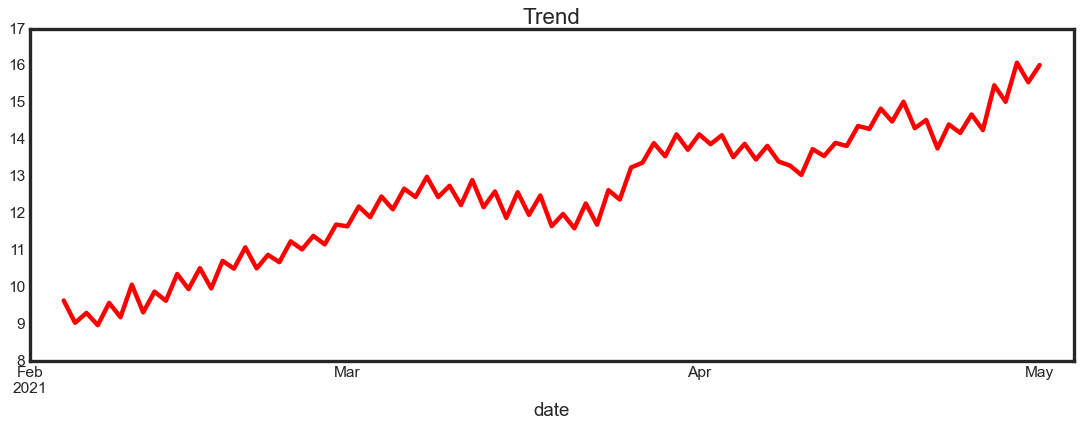

In [499]:
#Check seasonality for temperature

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15, 5), dpi=80)
analysis = daily_data[['input_temperature']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.trend.plot(color="red").set_title("Trend")


Text(0.5, 1.0, 'Seasonality')

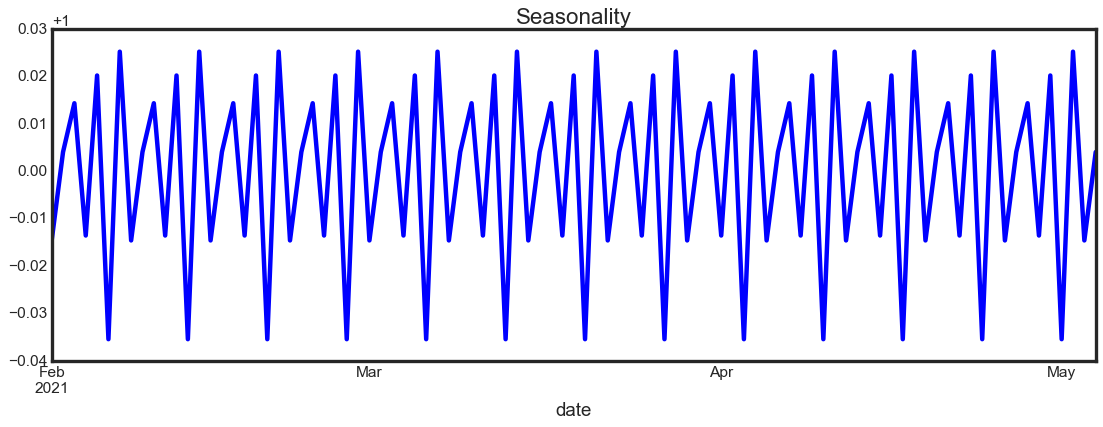

In [505]:
plt.figure(figsize=(15, 5), dpi=80)
decompose_result_mult.seasonal.plot(color="blue").set_title("Seasonality")

## In below plots, temperature, pressure, flow and velocity of each sensor by date was shown.

### 3.3.1. Flow – cm3/s values for X1 and X2 sensors

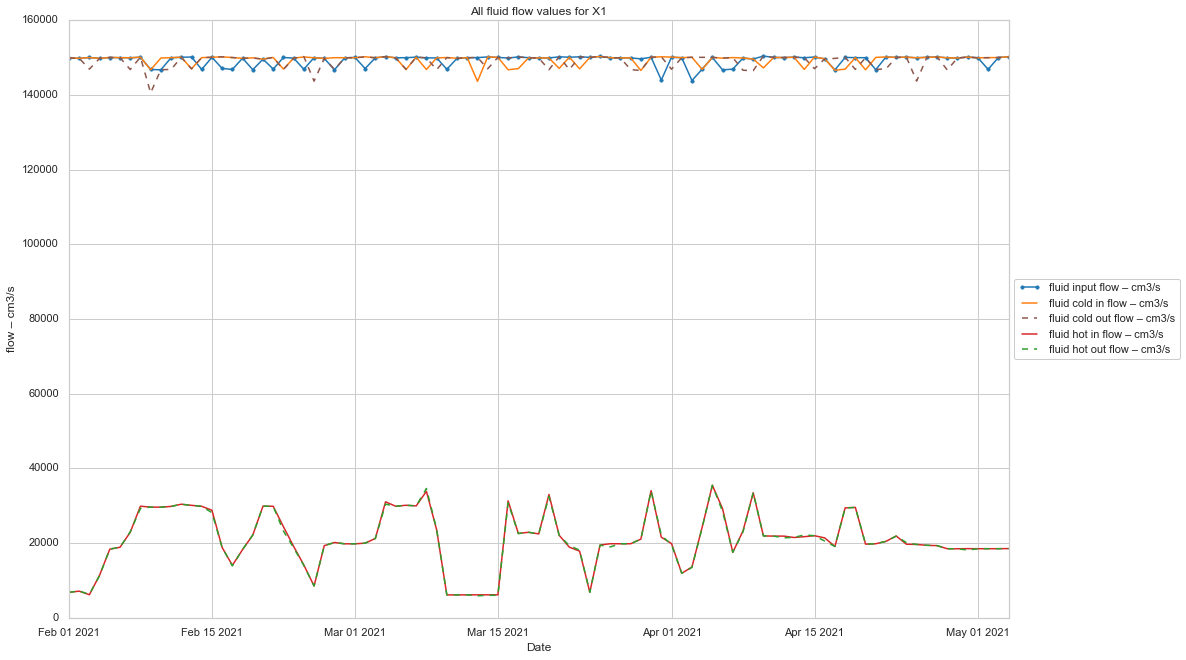

In [522]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('flow – cm3/s')
ax.set_title('All fluid flow values for X1')


ax.plot(daily_data.index, daily_data.input_flow, color='tab:blue',marker=".", markersize=7, label='fluid input flow – cm3/s')
ax.plot(daily_data.index, daily_data.X1_coldIn_flow, color='tab:orange', label='fluid cold in flow – cm3/s')
ax.plot(daily_data.index, daily_data.X1_coldOut_flow, color='tab:brown', linestyle='--', label='fluid cold out flow – cm3/s')
ax.plot(daily_data.index, daily_data.X1_hotIn_flow, color='tab:red', label='fluid hot in flow – cm3/s')
ax.plot(daily_data.index, daily_data.X1_hotOut_flow, color='tab:green', linestyle='--', label='fluid hot out flow – cm3/s')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

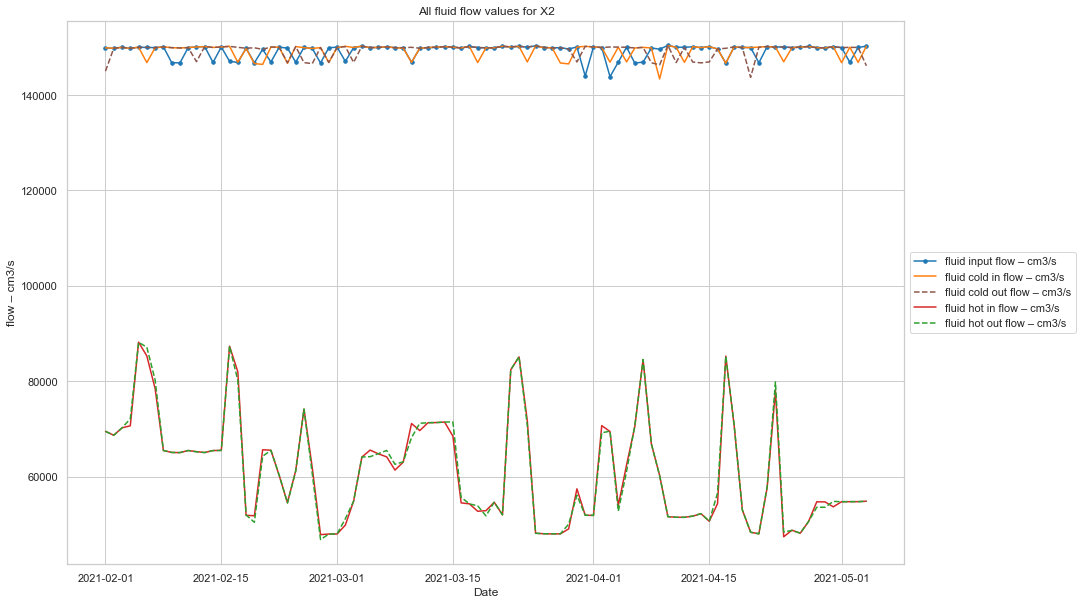

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('flow – cm3/s')
ax.set_title('All fluid flow values for X2')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_flow, color='tab:blue',marker=".", markersize=7, label='fluid input flow – cm3/s')
ax.plot(daily_data.index, daily_data.X2_coldIn_flow, color='tab:orange', label='fluid cold in flow – cm3/s')
ax.plot(daily_data.index, daily_data.X2_coldOut_flow, color='tab:brown', linestyle='--', label='fluid cold out flow – cm3/s')
ax.plot(daily_data.index, daily_data.X2_hotIn_flow, color='tab:red', label='fluid hot in flow – cm3/s')
ax.plot(daily_data.index, daily_data.X2_hotOut_flow, color='tab:green', linestyle='--', label='fluid hot out flow – cm3/s')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is seen that cold in flow and cold out flow shows small increases and decreases. In flow values for X1 and X2 sensors, both of them present exactly same pattern and same values (around 150000), in input, cold in and cold out flow. Fluid hot in and hot out flow shows sharp increases and decreases.Fluid hot in and hot out flow is between 60000-90000 in X2 sensor while fluid hot in and hot out flow is between 10000-30000 in X1 sensor. Fluid hot in and hot out flow shows different pattern in X1 and X2 sensors.

### 3.3.2. Pressure – g/cm2 values for X1 and X2 sensors

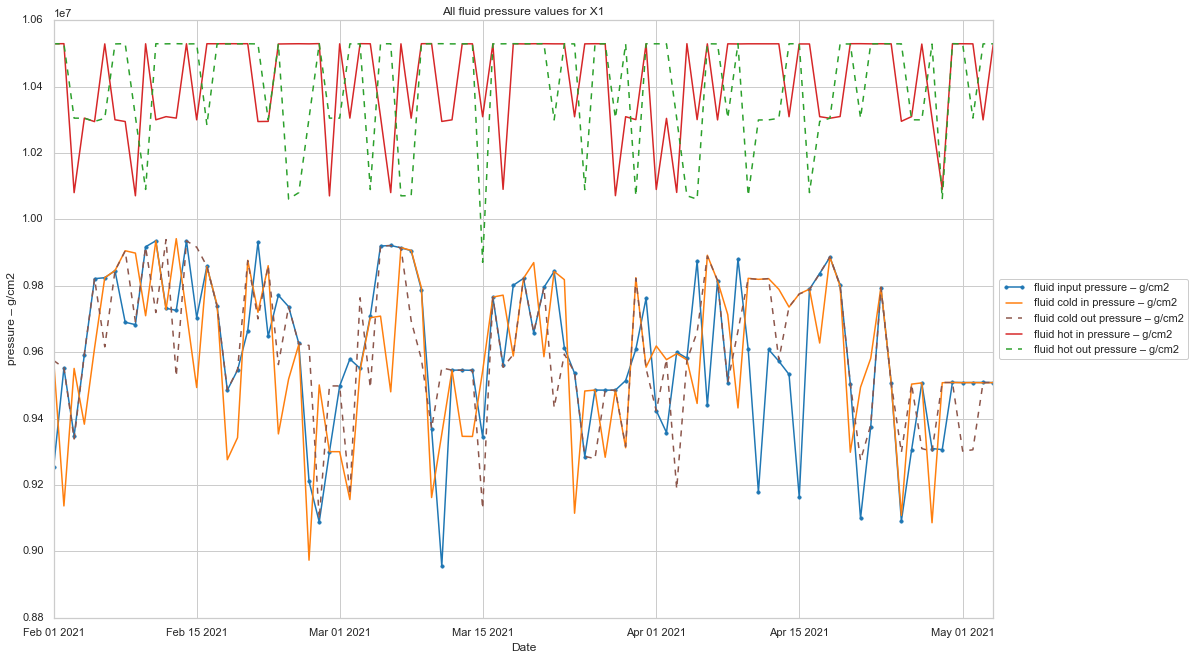

In [523]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('pressure – g/cm2')
ax.set_title('All fluid pressure values for X1')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_pressure, color='tab:blue',marker=".", markersize=7, label='fluid input pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X1_coldIn_pressure, color='tab:orange', label='fluid cold in pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X1_coldOut_pressure, color='tab:brown', linestyle='--', label='fluid cold out pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X1_hotIn_pressure, color='tab:red', label='fluid hot in pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X1_hotOut_pressure, color='tab:green', linestyle='--', label='fluid hot out pressure – g/cm2')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

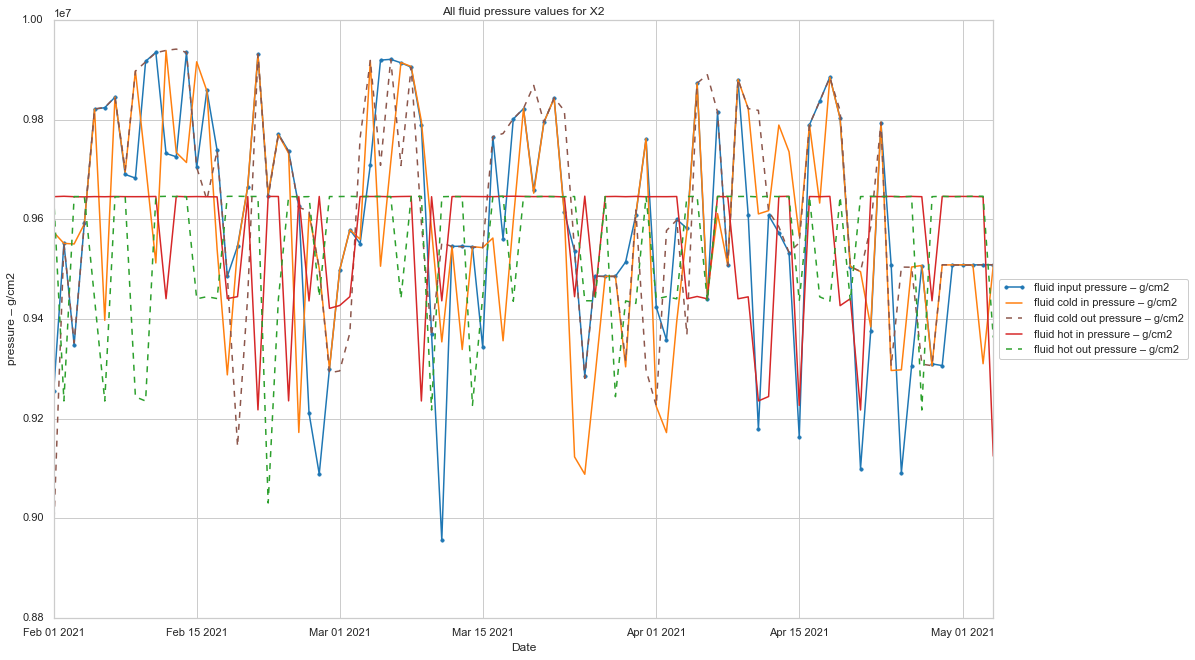

In [524]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('pressure – g/cm2')
ax.set_title('All fluid pressure values for X2')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_pressure, color='tab:blue',marker=".", markersize=7, label='fluid input pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X2_coldIn_pressure, color='tab:orange', label='fluid cold in pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X2_coldOut_pressure, color='tab:brown', linestyle='--', label='fluid cold out pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X2_hotIn_pressure, color='tab:red', label='fluid hot in pressure – g/cm2')
ax.plot(daily_data.index, daily_data.X2_hotOut_pressure, color='tab:green', linestyle='--', label='fluid hot out pressure – g/cm2')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is seen in pressure values for X1 and X2 sensors, both of them present same pattern, but their values are different. Fluid hot in pressure and hot out pressure for X1 sensor is around 1-1.5, while they are around 0.9-0.97 in X2 sensor. Fluid input, cold in and cold out pressure for X1 sensor is around 0.88-0.99, and they are exactly same with X2 sensor. Cold fluid values are equal for X1 and X2 sensor, but hot fluid values are different.


### 3.3.3. Temperature – °C  values for X1 and X2 sensors

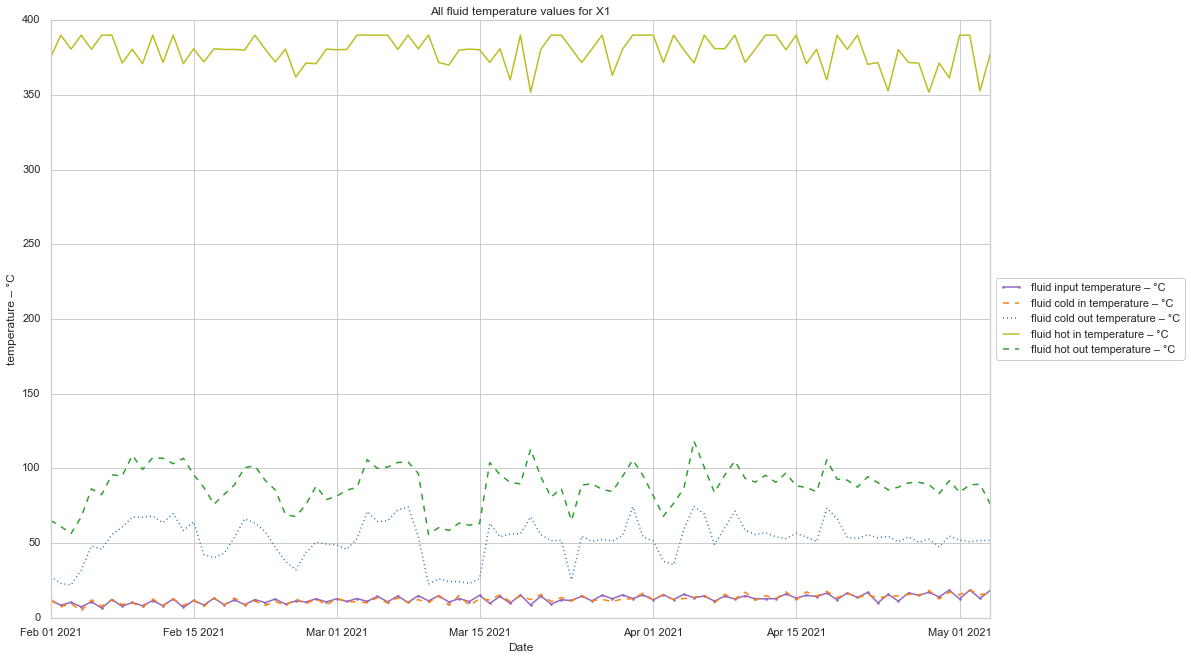

In [525]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('temperature – °C')
ax.set_title('All fluid temperature values for X1')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_temperature, color='tab:purple',marker=".", markersize=4,label='fluid input temperature – °C')
ax.plot(daily_data.index, daily_data.X1_coldIn_temperature, color='tab:orange', linestyle='--',label='fluid cold in temperature – °C')
ax.plot(daily_data.index, daily_data.X1_coldOut_temperature, color='tab:blue', linestyle=':', label='fluid cold out temperature – °C')
ax.plot(daily_data.index, daily_data.X1_hotIn_temperature, color='tab:olive', label='fluid hot in temperature – °C')
ax.plot(daily_data.index, daily_data.X1_hotOut_temperature, color='tab:green', linestyle='--', label='fluid hot out temperature – °C')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

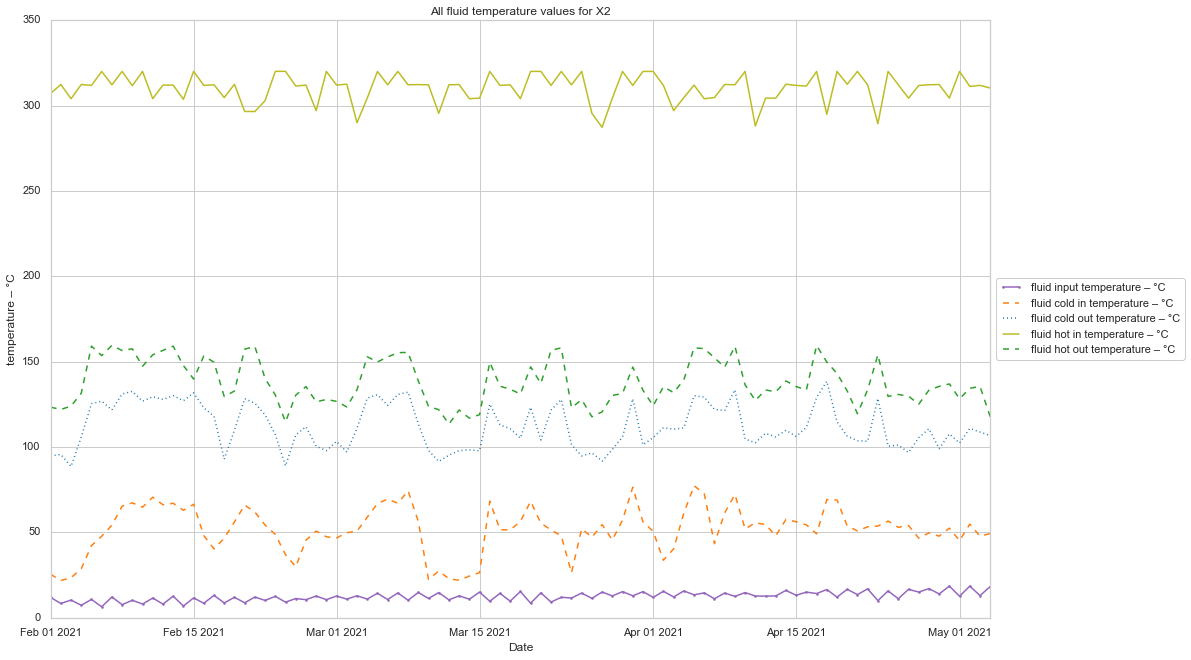

In [526]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('temperature – °C')
ax.set_title('All fluid temperature values for X2')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_temperature, color='tab:purple',marker=".", markersize=4,label='fluid input temperature – °C')
ax.plot(daily_data.index, daily_data.X2_coldIn_temperature, color='tab:orange', linestyle='--',label='fluid cold in temperature – °C')
ax.plot(daily_data.index, daily_data.X2_coldOut_temperature, color='tab:blue', linestyle=':', label='fluid cold out temperature – °C')
ax.plot(daily_data.index, daily_data.X2_hotIn_temperature, color='tab:olive', label='fluid hot in temperature – °C')
ax.plot(daily_data.index, daily_data.X2_hotOut_temperature, color='tab:green', linestyle='--', label='fluid hot out temperature – °C')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

When we look at the temperature values for X1 and X2 sensors, fluid hot out, cold out and hot out temperature values show same pattern, but different values. Fluid cold in shows different pattern in both sensor. Fluid cold out and hot out temperature values are around 30-120 in X1 sensor while fluid cold out and hot out temperature values are around 98-160 in X2 sensor. Fluid cold in temperature is around 25 in X1 while it is between 25-80 in X2 sensor and in both sensor it shows different pattern. Cold in, cold out and hot out shows increases and decreases slowly.

### 3.3.4. Speed – cm/s values for X1 and X2 sensors

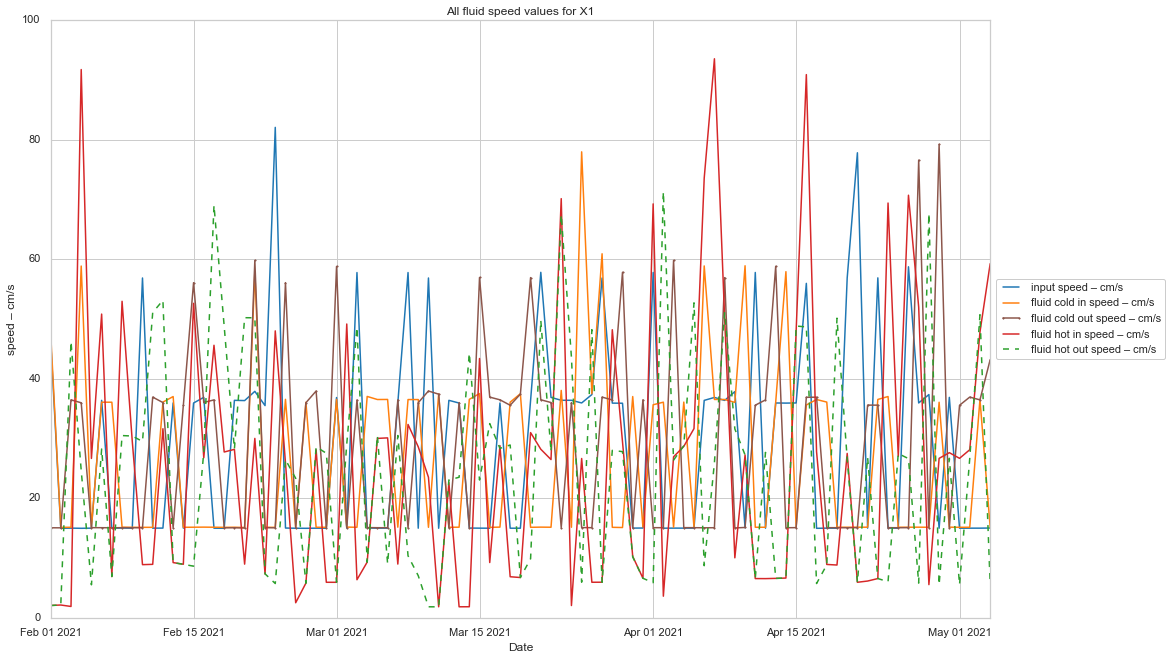

In [527]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('speed – cm/s')
ax.set_title('All fluid speed values for X1')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_velocity, color='tab:blue', label='input speed – cm/s')
ax.plot(daily_data.index, daily_data.X1_coldIn_velocity, color='tab:orange', label='fluid cold in speed – cm/s')
ax.plot(daily_data.index, daily_data.X1_coldOut_velocity, color='tab:brown',marker=".", markersize=3, label='fluid cold out speed – cm/s')
ax.plot(daily_data.index, daily_data.X1_hotIn_velocity, color='tab:red', label='fluid hot in speed – cm/s')
ax.plot(daily_data.index, daily_data.X1_hotOut_velocity, color='tab:green', linestyle='--', label='fluid hot out speed – cm/s')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

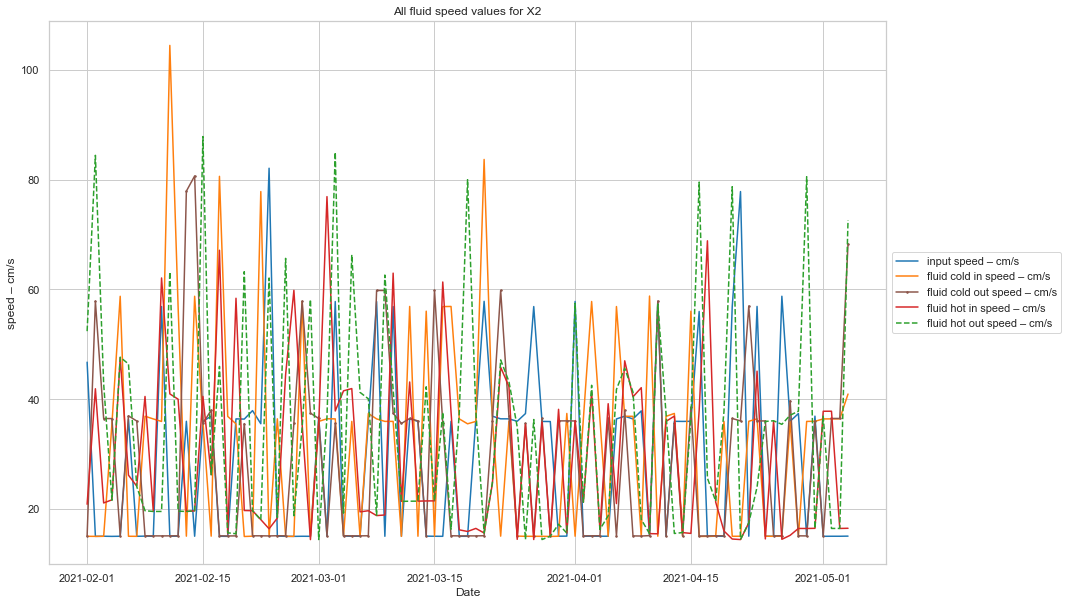

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('speed – cm/s')
ax.set_title('All fluid speed values for X2')
ax.grid(True)

ax.plot(daily_data.index, daily_data.input_velocity, color='tab:blue', label='input speed – cm/s')
ax.plot(daily_data.index, daily_data.X2_coldIn_velocity, color='tab:orange', label='fluid cold in speed – cm/s')
ax.plot(daily_data.index, daily_data.X2_coldOut_velocity, color='tab:brown',marker=".", markersize=3, label='fluid cold out speed – cm/s')
ax.plot(daily_data.index, daily_data.X2_hotIn_velocity, color='tab:red', label='fluid hot in speed – cm/s')
ax.plot(daily_data.index, daily_data.X2_hotOut_velocity, color='tab:green', linestyle='--', label='fluid hot out speed – cm/s')


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is seen from the speed values for X1 and X2 sensors, both of them present similar pattern, but their values are different. Fluid hot in speed in X1 sensor is higher than X2 sensor. X1 hot in speed value is around 0-90 while it  is around 0-60 in X2 sensor. Fluid hot out speed in X1 sensor is smaller than X2 sensor. X1 hot out speed is around 0-70 while it is around 10-90 in X2 sensor. Fluid cold in speed in X1 sensor is smaller than X2 sensor. X1 cold in speed is around 10-70 while it is around 10-120 in X2 sensor.


## 3.4. Outliers

IQR based filtering :

Used when our data distribution is skewed.

In [528]:
percentile25 = overall_data.quantile(0.25)
percentile75 = overall_data.quantile(0.75)
iqr = percentile75- percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

### Finding Outliers

In [529]:
overall_data[overall_data > upper_limit]
overall_data[overall_data < lower_limit]

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,source,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-40.0,NaN,NaN,NaN
2021-02-01 08:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01 08:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01 08:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01 08:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-04 19:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-04 19:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-04 19:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Trimming = data without outliers

In [530]:
overall_data1 = overall_data[overall_data < upper_limit]
overall_data2 = overall_data1[overall_data > lower_limit]
overall_data2.head()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,source,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,...,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,0.011096,0.000813,149819.0,9631200.0,10.2,14.98,NaN,150111.0,9635600.0,10.1,...,150056.0,9643400.0,101.4,15.07,75188.0,NaN,NaN,22.53,NaN,NaN
2021-02-01 08:01:00,0.011096,0.000813,150503.0,9633100.0,10.4,15.05,NaN,149390.0,9635200.0,10.6,...,149505.0,9642600.0,NaN,15.02,74794.0,9642800.0,138.4,22.44,NaN,NaN
2021-02-01 08:02:00,0.011096,0.000813,149128.0,9633100.0,10.6,14.86,NaN,149616.0,9633400.0,10.7,...,150074.0,9638500.0,101.0,15.09,74926.0,9646500.0,131.6,22.48,NaN,NaN
2021-02-01 08:03:00,0.011096,0.000813,149747.0,9634900.0,11.1,14.96,NaN,149729.0,9635500.0,10.2,...,151585.0,9637500.0,101.6,15.27,75758.0,9644200.0,132.1,22.72,NaN,NaN
2021-02-01 08:04:00,0.011096,0.000813,150382.0,9634500.0,10.0,15.05,NaN,149507.0,9637300.0,10.0,...,149705.0,9642300.0,101.4,15.08,74453.0,9646900.0,130.2,22.33,NaN,NaN


### <span style="background-color:violet">Let see the plot of some variables with outliers and without outliers.</span>   

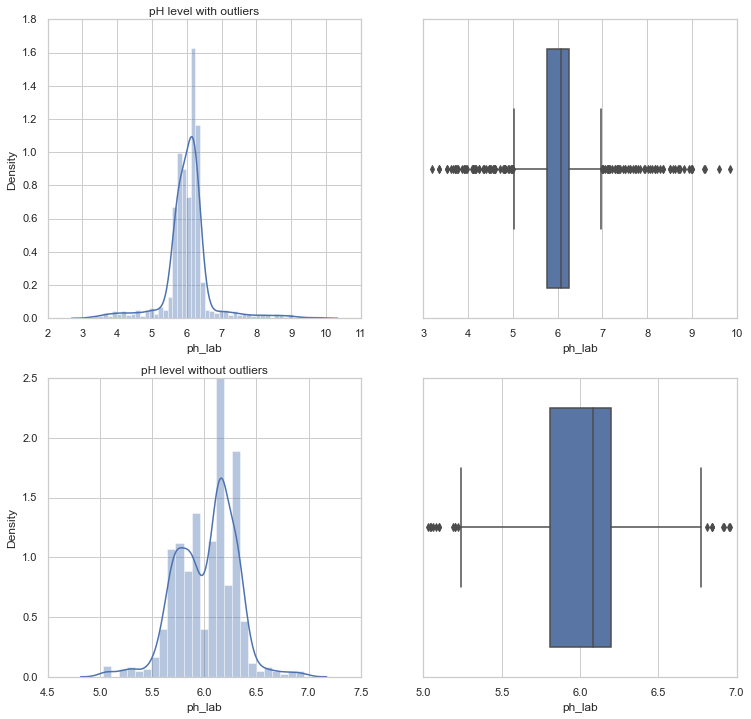

In [531]:
plt.figure(figsize=(11,11))
plt.subplot(2,2,1)
sns.distplot(overall_data['ph_lab']).set_title('pH level with outliers')
plt.subplot(2,2,2)
sns.boxplot(overall_data['ph_lab'])
plt.subplot(2,2,3)
sns.distplot(overall_data2['ph_lab']).set_title('pH level without outliers')
plt.subplot(2,2,4)
sns.boxplot(overall_data2['ph_lab'])
plt.show()

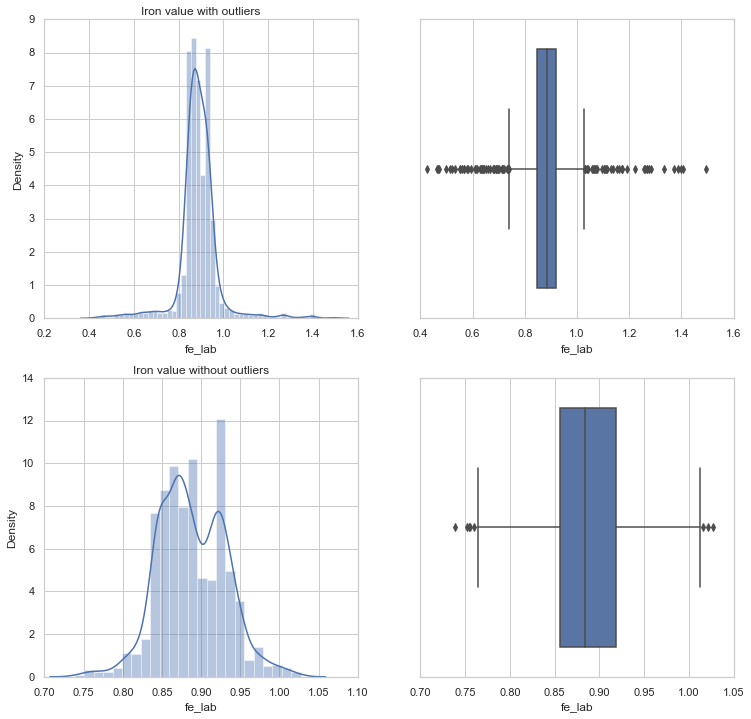

In [532]:
plt.figure(figsize=(11,11))
plt.subplot(2,2,1)
sns.distplot(overall_data['fe_lab']).set_title('Iron value with outliers')
plt.subplot(2,2,2)
sns.boxplot(overall_data['fe_lab'])
plt.subplot(2,2,3)
sns.distplot(overall_data2['fe_lab']).set_title('Iron value without outliers')
plt.subplot(2,2,4)
sns.boxplot(overall_data2['fe_lab'])
plt.show()

## 3.5. Missingness

We see in the below output, number of missing values in each column.

In [21]:
for columns in alligned_data:
    print(columns, "--> # of missing value", alligned_data[columns].isna().sum())

caustic --> # of missing value 0
cinh --> # of missing value 0
input_flow --> # of missing value 49
input_pressure --> # of missing value 126
input_temperature --> # of missing value 222
input_velocity --> # of missing value 186
source --> # of missing value 0
X1_coldIn_flow --> # of missing value 43
X1_coldIn_pressure --> # of missing value 141
X1_coldIn_temperature --> # of missing value 224
X1_coldIn_velocity --> # of missing value 184
X1_hotIn_flow --> # of missing value 45
X1_hotIn_pressure --> # of missing value 120
X1_hotIn_temperature --> # of missing value 213
X1_hotIn_velocity --> # of missing value 181
X1_coldOut_flow --> # of missing value 38
X1_coldOut_pressure --> # of missing value 132
X1_coldOut_temperature --> # of missing value 221
X1_coldOut_velocity --> # of missing value 173
X1_hotOut_flow --> # of missing value 42
X1_hotOut_pressure --> # of missing value 139
X1_hotOut_temperature --> # of missing value 221
X1_hotOut_velocity --> # of missing value 164
X2_coldIn_f

<AxesSubplot:>

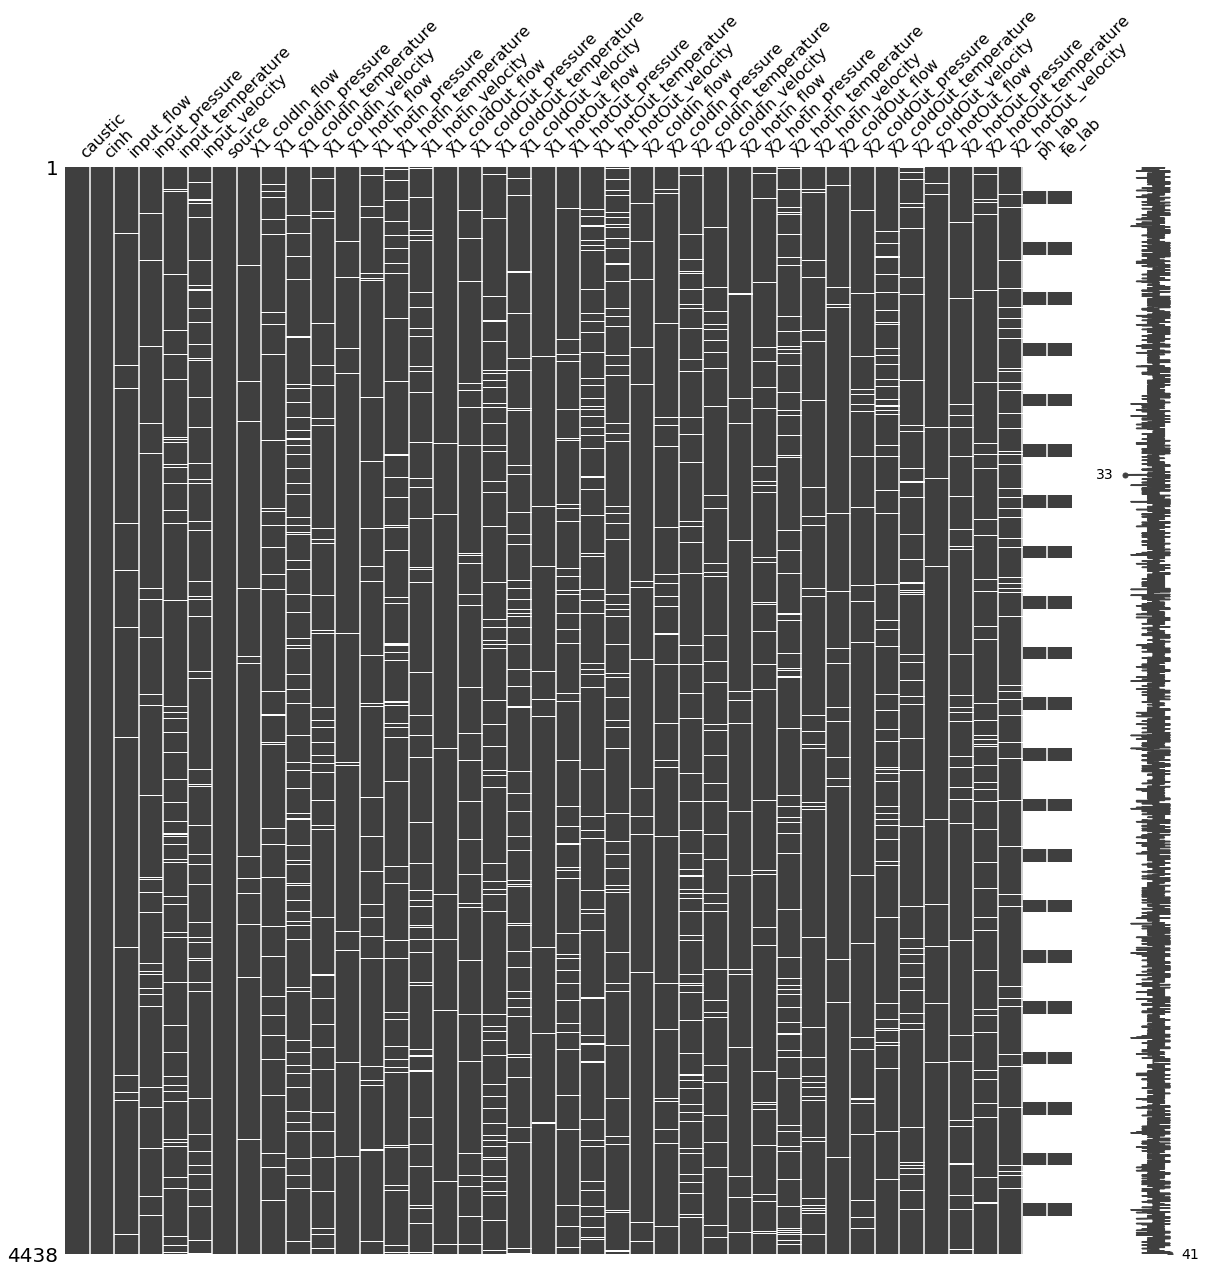

In [23]:
msno.matrix(alligned_data, figsize=(20,20))
# we see the pattern of missing values in the below matrix

<AxesSubplot:>

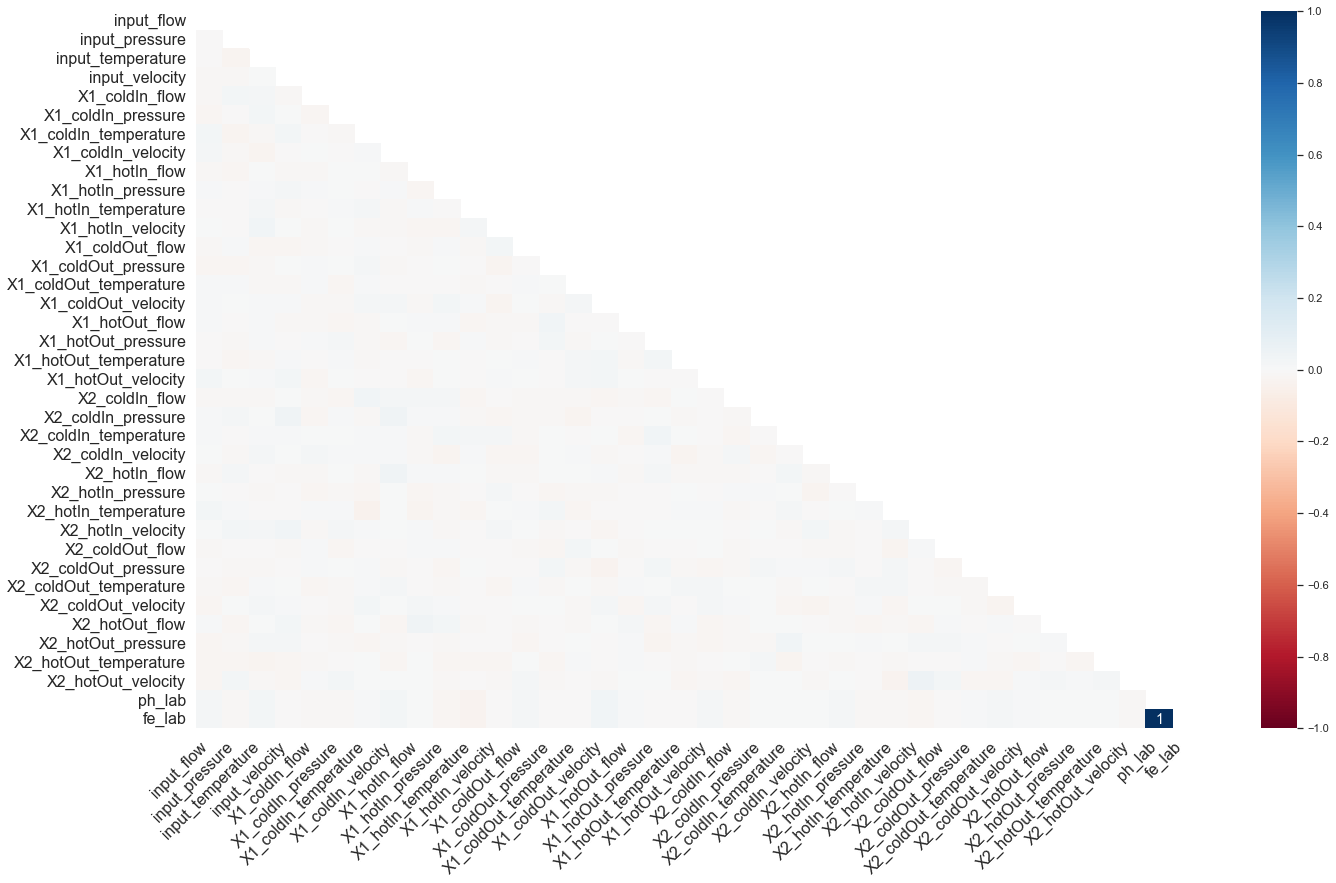

In [534]:
msno.heatmap(alligned_data, figsize=(20,12))

Heatmap shows the correlation of missingness between every 2 columns. In the above heatmap, we observe that correlations are very close to 0. That means there is no dependence between the occurrence of missing values of two variables.

In [352]:
alligned_data2 = alligned_data.drop(["source","fe_lab"], axis=1)
np.random.seed(5)
imp1 = mice.MICEData(alligned_data2)
fml1 = 'ph_lab ~ caustic+cinh+input_flow+input_pressure+input_temperature+input_velocity+X1_coldIn_flow+X1_coldIn_pressure+X1_coldIn_temperature+X1_coldIn_velocity+X1_hotIn_flow+X1_hotIn_pressure+X1_hotIn_temperature+X1_hotIn_velocity+X1_coldOut_flow+X1_coldOut_pressure+X1_coldOut_temperature+X1_coldOut_velocity+X1_hotOut_flow+X1_hotOut_pressure+X1_hotOut_temperature+X1_hotOut_velocity+X2_coldIn_flow+X2_coldIn_pressure+X2_coldIn_temperature+X2_coldIn_velocity+X2_hotIn_flow+X2_hotIn_pressure+X2_hotIn_temperature+X2_hotIn_velocity+X2_coldOut_flow+X2_coldOut_pressure+X2_coldOut_temperature+X2_coldOut_velocity+X2_hotOut_flow+X2_hotOut_pressure+X2_hotOut_temperature+X2_hotOut_velocity'
mice1 = mice.MICE(fml1, sm.OLS, imp1)
results1 = mice1.fit(0,3)
print(results1.summary())

                                  Results: MICE
Method:                         MICE              Sample size:                4438
Model:                          OLS               Scale                       0.37
Dependent variable:             ph_lab            Num. imputations            3   
----------------------------------------------------------------------------------
                         Coef.   Std.Err.    t    P>|t|   [0.025    0.975]   FMI  
----------------------------------------------------------------------------------
Intercept                 4.4000   0.9874  4.4561 0.0000   2.4647    6.3353 0.7976
caustic                  30.5170  18.4554  1.6536 0.0982  -5.6549   66.6889 0.9819
cinh                   1822.4216 454.0343  4.0138 0.0001 932.5308 2712.3125 0.8283
input_flow               -0.0000   0.0000 -0.2435 0.8076  -0.0000    0.0000 0.0079
input_pressure            0.0000   0.0000  0.1927 0.8472  -0.0000    0.0000 0.2131
input_temperature        -0.0001   0.00

In [708]:
d=np.zeros(alligned_data2.shape)
dumb=pd.DataFrame(d, columns=["caustic","cinh","input_flow","input_pressure","input_temperature","input_velocity","X1_coldIn_flow","X1_coldIn_pressure","X1_coldIn_temperature","X1_coldIn_velocity","X1_hotIn_flow","X1_hotIn_pressure","X1_hotIn_temperature","X1_hotIn_velocity","X1_coldOut_flow","X1_coldOut_pressure","X1_coldOut_temperature","X1_coldOut_velocity","X1_hotOut_flow","X1_hotOut_pressure","X1_hotOut_temperature","X1_hotOut_velocity","X2_coldIn_flow","X2_coldIn_pressure","X2_coldIn_temperature","X2_coldIn_velocity","X2_hotIn_flow","X2_hotIn_pressure","X2_hotIn_temperature","X2_hotIn_velocity","X2_coldOut_flow","X2_coldOut_pressure","X2_coldOut_temperature","X2_coldOut_velocity","X2_hotOut_flow","X2_hotOut_pressure","X2_hotOut_temperature","X2_hotOut_velocity","ph_lab"])
for i in range(3):
    print(imp1.next_sample().head())
    dumb=dumb+imp1.data
#     print(imp1.data.head())
    print("---------")    
fill_mice_data=dumb/3
fill_mice_data.head()

    caustic      cinh  input_flow  input_pressure  input_temperature  \
0  0.011096  0.000813    149819.0       9631200.0               10.2   
1  0.009997  0.000855    149728.0       9634800.0               10.8   
2  0.009997  0.000855    149351.0       9613100.0               11.0   
3  0.009997  0.000855    150285.0       9611400.0              -40.0   
4  0.009997  0.000855    149260.0       9611800.0               12.0   

   input_velocity  X1_coldIn_flow  X1_coldIn_pressure  X1_coldIn_temperature  \
0           14.98        149819.0           9631600.0                   10.1   
1           14.98        149707.0           9632600.0                   10.8   
2           14.94        149345.0           9612800.0                   11.0   
3           15.03        150260.0           9608600.0                   11.4   
4           14.89        149234.0           9610500.0                   12.2   

   X1_coldIn_velocity  ...  X2_hotIn_velocity  X2_coldOut_flow  \
0               15.1

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_hotIn_velocity,X2_coldOut_flow,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab
0,0.011096,0.000813,149819.0,9631200.0,10.2,14.98,149819.0,9631600.0,10.1,15.130000,...,21.93,149848.0,9630400.0,98.9,15.08,73062.0,9647300.0,131.9,999.00,8.360000
1,0.009997,0.000855,149728.0,9634800.0,10.8,14.98,149707.0,9632600.0,10.8,15.090000,...,21.98,149699.0,0.0,100.3,15.01,73238.0,9645200.0,130.3,21.95,5.766667
2,0.009997,0.000855,149351.0,9613100.0,11.0,14.94,149345.0,9612800.0,11.0,15.060000,...,20.99,149351.0,9611100.0,97.8,15.00,69922.0,9645200.0,130.9,20.95,4.976667
3,0.009997,0.000855,150285.0,9611400.0,-40.0,15.03,150260.0,9608600.0,11.4,15.093333,...,21.18,150278.0,9611600.0,99.0,15.11,70648.0,9643900.0,127.4,21.18,5.410000
4,0.009997,0.000855,149260.0,9611800.0,12.0,14.89,149234.0,9610500.0,12.2,15.070000,...,21.23,149276.0,9610700.0,100.1,15.04,70707.0,9643000.0,126.2,21.20,7.730000


In [709]:
fill_mice_data = fill_mice_data.drop(["ph_lab"], axis=1)
date = alligned_data.index
date = pd.DataFrame(date)
data_date = pd.concat([date, fill_mice_data], axis=1)
data_date= data_date.set_index("date") 

In [841]:
fe_lab= alligned_data.fe_lab
fe_lab=pd.DataFrame(fe_lab)

ph_lab= alligned_data.ph_lab
ph_lab=pd.DataFrame(ph_lab)


source= alligned_data.source
source=pd.DataFrame(source)

data = pd.concat([data_date, ph_lab, fe_lab, source], axis=1)

## <span style="background-color:violet"> Clean, merged, alligned, imputed dataset (cleaned version of the data set)</span>  

In [842]:
data.head(20)

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_coldOut_pressure,X2_coldOut_temperature,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab,source
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,0.011096,0.000813,149819.0,9.631200e+06,10.2,14.98,149819.0,9631600.0,10.1,15.130000,...,9630400.0,98.9,15.080000,73062.0,9.647300e+06,131.9,999.00,8.36,1.270,A
2021-02-01 08:30:00,0.009997,0.000855,149728.0,9.634800e+06,10.8,14.98,149707.0,9632600.0,10.8,15.090000,...,0.0,100.3,15.010000,73238.0,9.645200e+06,130.3,21.95,NaN,NaN,A
2021-02-01 09:00:00,0.009997,0.000855,149351.0,9.613100e+06,11.0,14.94,149345.0,9612800.0,11.0,15.060000,...,9611100.0,97.8,15.000000,69922.0,9.645200e+06,130.9,20.95,NaN,NaN,A
2021-02-01 09:30:00,0.009997,0.000855,150285.0,9.611400e+06,-40.0,15.03,150260.0,9608600.0,11.4,15.093333,...,9611600.0,99.0,15.110000,70648.0,9.643900e+06,127.4,21.18,NaN,NaN,A
2021-02-01 10:00:00,0.009997,0.000855,149260.0,9.611800e+06,12.0,14.89,149234.0,9610500.0,12.2,15.070000,...,9610700.0,100.1,15.040000,70707.0,9.643000e+06,126.2,21.20,7.73,1.116,A
2021-02-01 10:30:00,0.009006,0.000898,150285.0,9.597100e+06,11.9,15.01,150234.0,9596200.0,11.9,15.140000,...,9598000.0,98.2,15.110000,70078.0,9.646400e+06,128.9,21.03,NaN,NaN,A
2021-02-01 11:00:00,0.009006,0.000898,149205.0,9.599100e+06,11.7,14.91,149211.0,9596500.0,11.8,15.070000,...,9599600.0,96.6,14.996667,69290.0,9.643400e+06,131.5,20.78,NaN,NaN,A
2021-02-01 11:30:00,0.009006,0.000898,147165.0,9.598300e+06,12.3,14.73,147166.0,9597300.0,12.2,14.870000,...,9599500.0,98.3,14.790000,68362.0,9.649800e+06,128.6,20.52,NaN,NaN,A
2021-02-01 12:00:00,0.009006,0.000898,150586.0,9.514967e+06,12.5,15.06,150578.0,9598500.0,12.5,15.200000,...,9598300.0,98.9,15.140000,69998.0,9.644400e+06,126.3,20.97,7.32,1.006,A


In [96]:
for columns in alligned_data:
    print(columns, "--> # of missing value", data[columns].isna().sum())

caustic --> # of missing value 0
cinh --> # of missing value 0
input_flow --> # of missing value 0
input_pressure --> # of missing value 0
input_temperature --> # of missing value 0
input_velocity --> # of missing value 0
source --> # of missing value 0
X1_coldIn_flow --> # of missing value 0
X1_coldIn_pressure --> # of missing value 0
X1_coldIn_temperature --> # of missing value 0
X1_coldIn_velocity --> # of missing value 0
X1_hotIn_flow --> # of missing value 0
X1_hotIn_pressure --> # of missing value 0
X1_hotIn_temperature --> # of missing value 0
X1_hotIn_velocity --> # of missing value 0
X1_coldOut_flow --> # of missing value 0
X1_coldOut_pressure --> # of missing value 0
X1_coldOut_temperature --> # of missing value 0
X1_coldOut_velocity --> # of missing value 0
X1_hotOut_flow --> # of missing value 0
X1_hotOut_pressure --> # of missing value 0
X1_hotOut_temperature --> # of missing value 0
X1_hotOut_velocity --> # of missing value 0
X2_coldIn_flow --> # of missing value 0
X2_col

As seen that we impute all the missing values in the data. In the ph_lab and fe_lab NA values not actually Na, they occurs when we merge data.

<AxesSubplot:>

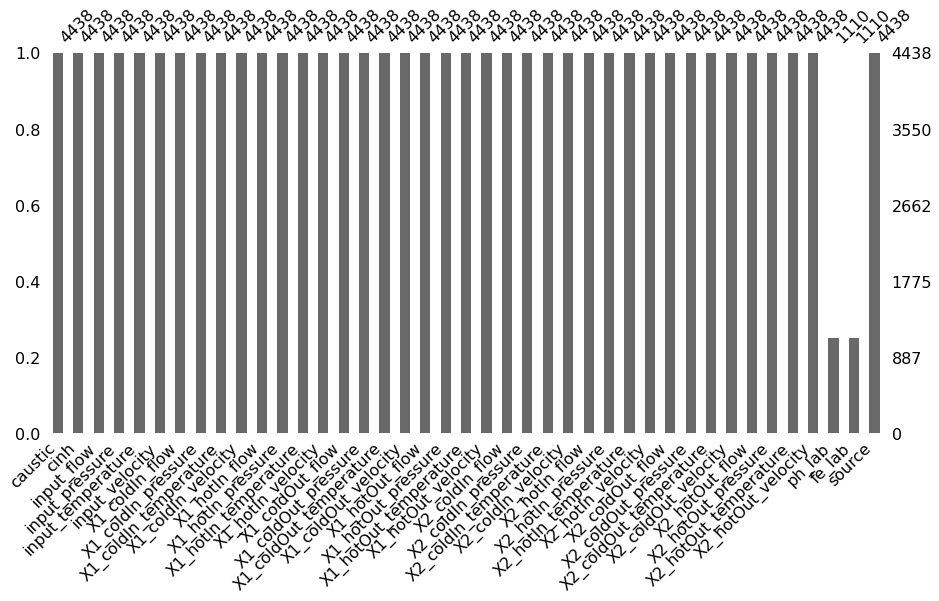

In [101]:
msno.bar(data, figsize=(15,7))

## 4. Modelling

## 4.1. Prediction of pH level

Our aim in this section is to predict the pH level of the liquid flowing in the equipment. It is wondered how pH level of the liquied affected by the caustic soda (referred to as "caustic"), corrosion inhibitor (referred to as "cinh"), input temperature, pressure, flow, velocity and sensor readings. Firstly, SVM had conducted to predict pH level and then decision tree regression was conducted.

Separating data into training and testing sets is a crucial part of the modeling. By splitting data into training and testing, the effects of data discrepancies can be minimized and better understand the characteristics of the model. After the model had conducted by using the training set, we tested the model by making predictions against the test set.

### 4.1.1. Support Vector Mechine

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. It should be chosen a kernel and parameter and regularization if needed. (Gaussian Kernel and noise regularization are an instance for both steps). The most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian SVR. We have a non-linear condition, so we can select polynomial or gaussian but here we select RBF(a gaussian type) kernel. Epsilon in the epsilon-SVR model is also tunned. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

### Scaled features

In [712]:
# pH and Iron data set
pH_fe_data = data.dropna()
X= pH_fe_data.iloc[:,:38]
y= pH_fe_data["ph_lab"]

In [843]:
#Scaling independent variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features =pd.DataFrame(scaled_features, columns=["caustic","cinh","input_flow","input_pressure","input_temperature","input_velocity","X1_coldIn_flow","X1_coldIn_pressure","X1_coldIn_temperature","X1_coldIn_velocity","X1_hotIn_flow","X1_hotIn_pressure","X1_hotIn_temperature","X1_hotIn_velocity","X1_coldOut_flow","X1_coldOut_pressure","X1_coldOut_temperature","X1_coldOut_velocity","X1_hotOut_flow","X1_hotOut_pressure","X1_hotOut_temperature","X1_hotOut_velocity","X2_coldIn_flow","X2_coldIn_pressure","X2_coldIn_temperature","X2_coldIn_velocity","X2_hotIn_flow","X2_hotIn_pressure","X2_hotIn_temperature","X2_hotIn_velocity","X2_coldOut_flow","X2_coldOut_pressure","X2_coldOut_temperature","X2_coldOut_velocity","X2_hotOut_flow","X2_hotOut_pressure","X2_hotOut_temperature","X2_hotOut_velocity"])

#scaled_features.info()

In [844]:
# Test- Validation- Train Split
x_train = scaled_features.iloc[range(0,801,1)]
x_val = scaled_features.iloc[range(801,957,1)]
x_test = scaled_features.iloc[range(957,1110,1)]

y_train = y[0:801]
y_val = y[801:957]
y_test = y[957:1110]

In [845]:
#cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
#sns.clustermap(data.corr(), figsize=(10, 10), cmap=cmap)

In [846]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf', gamma="scale", epsilon=0.05,C=500)
svm.fit(x_train, y_train)

SVR(C=500, epsilon=0.05)

In [847]:
y_val_pred_svm = svm.predict(x_val)
y_train_pred_svm = svm.predict(x_train)
print('train MSE is', metrics.mean_squared_error(y_train,y_train_pred_svm))
print('test MSE is', metrics.mean_squared_error(y_val,y_val_pred_svm))  

train MSE is 0.028562773403990587
test MSE is 0.10931540284814016


In [848]:
def mse(score):
    mse = np.sqrt(-score)
    print(f'RMSE= {"{:.2f}".format(mse)}')

In [849]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble


kf =KFold(n_splits=30, shuffle=True, random_state=571)

score = cross_val_score(svm, x_test, y_test, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
mse(score.mean())

Scores for each fold: [-0.00945216 -0.00518289 -0.00526394 -0.00221241 -0.0074008  -0.09283904
 -0.00145428 -0.0155004  -0.00150207 -0.00228147 -0.00554174 -0.01270501
 -0.00844951 -0.00853812 -0.00254215 -0.00232883 -0.04656324 -0.01204095
 -0.01062202 -0.03429423 -0.0044952  -0.00383414 -0.00162153 -0.10170318
 -0.00166983 -0.01360096 -0.0132915  -0.05233812 -0.00256275 -0.00420071]
RMSE= 0.13


### Polynomial features

In [850]:
# perform a polynomial features transform of the covariates
trans = PolynomialFeatures(degree=2)
polynomial_features = trans.fit_transform(X)
polynomial_features =pd.DataFrame(polynomial_features)
polynomial_features.head()

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,1.0,0.011096,0.000813,149819.0,9.631200e+06,10.2,14.98,149819.0,9631600.0,10.1,...,5.338056e+09,7.048510e+11,9636877.8,72988938.00,9.307040e+13,1.272479e+09,9.637653e+09,17397.61,131768.100,998001.0000
1,1.0,0.009997,0.000855,149260.0,9.611800e+06,12.0,14.89,149234.0,9610500.0,12.2,...,4.999480e+09,6.818276e+11,8923223.4,1498988.40,9.298745e+13,1.216947e+09,2.044316e+08,15926.44,2675.440,449.4400
2,1.0,0.009006,0.000898,150586.0,9.514967e+06,12.5,15.06,150578.0,9598500.0,12.5,...,4.899720e+09,6.750887e+11,8840747.4,1467858.06,9.301445e+13,1.218088e+09,2.022431e+08,15951.69,2648.511,439.7409
3,1.0,0.008113,0.000944,149063.0,9.577600e+06,13.6,14.89,150588.0,9580000.0,12.4,...,4.803599e+09,6.687321e+11,8996178.4,1439527.16,9.309741e+13,1.252401e+09,2.004035e+08,16848.04,2695.946,431.3929
4,1.0,0.007307,0.000945,151495.0,9.561900e+06,14.9,15.17,151495.0,9566600.0,14.9,...,4.893142e+09,6.749012e+11,9072644.7,1466872.47,9.308776e+13,1.251372e+09,2.023228e+08,16822.09,2719.809,439.7409


In [851]:
# Test- Validation- Train Split
x_train_p = polynomial_features.iloc[range(0,801,1)]
x_val_p = polynomial_features.iloc[range(801,957,1)]
x_test_p = polynomial_features.iloc[range(957,1110,1)]

In [858]:
svm_p = SVR(kernel = 'rbf', epsilon=2, C=10)
svm_p.fit(x_train_p, y_train)

SVR(C=10, epsilon=2)

In [859]:
y_val_pred_svm_p = svm_p.predict(x_val_p)
y_train_pred_svm_p = svm_p.predict(x_train_p)
print('train MSE is', metrics.mean_squared_error(y_train,y_train_pred_svm_p))
print('test MSE is', metrics.mean_squared_error(y_val,y_val_pred_svm_p))  

train MSE is 0.613258043378162
test MSE is 0.28949508481316993


In [860]:
kf =KFold(n_splits=15, shuffle=True, random_state=571)

score_p = cross_val_score(svm_p, 
                        x_test_p, y_test, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_p}')
mse(score_p.mean())

Scores for each fold: [-0.05731591 -0.07480682 -0.12015227 -0.042125   -0.050925   -0.050925
 -0.068785   -0.049025   -0.070725   -0.123205   -0.035645   -0.108685
 -0.053185   -0.27442    -0.052325  ]
RMSE= 0.29


### 4.1.2. Decision Tree Regression

As in linear regression, data was splitted into two part as training set and test set. Again, to decide size of the test set, we look mean square error of the decision tree regression at each size of test set. Then, we decided at which size of the test set gives minimum mean square error in the result of the decision tree regression.

Then, max_ depth value, which is maximum depth of the tree, is decided which gives minimum "mean square error" at choosen test size.

Some parameters of decision tree is stated below:

- criterion{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

- splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depthint, default=None
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

- ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.


- min_weight_fraction_leaf float, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.


We decide at which max_depth value, MSE is smallest.

## Decison Tree with scaled features

In [861]:
#Scaling independent variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features =pd.DataFrame(scaled_features, columns=["caustic","cinh","input_flow","input_pressure","input_temperature","input_velocity","X1_coldIn_flow","X1_coldIn_pressure","X1_coldIn_temperature","X1_coldIn_velocity","X1_hotIn_flow","X1_hotIn_pressure","X1_hotIn_temperature","X1_hotIn_velocity","X1_coldOut_flow","X1_coldOut_pressure","X1_coldOut_temperature","X1_coldOut_velocity","X1_hotOut_flow","X1_hotOut_pressure","X1_hotOut_temperature","X1_hotOut_velocity","X2_coldIn_flow","X2_coldIn_pressure","X2_coldIn_temperature","X2_coldIn_velocity","X2_hotIn_flow","X2_hotIn_pressure","X2_hotIn_temperature","X2_hotIn_velocity","X2_coldOut_flow","X2_coldOut_pressure","X2_coldOut_temperature","X2_coldOut_velocity","X2_hotOut_flow","X2_hotOut_pressure","X2_hotOut_temperature","X2_hotOut_velocity"])

In [862]:
# Test- Validation- Train Split
x_train = scaled_features.iloc[range(0,801,1)]
x_val = scaled_features.iloc[range(801,957,1)]
x_test = scaled_features.iloc[range(957,1110,1)]

y_train = y[0:801]
y_val = y[801:957]
y_test = y[957:1110]

In [863]:
#Tunning max_depth for decision tree

for i in range(1, 51, 1):
    model_dec_tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
    model_dec_tree.fit(x_train, y_train)
    
    y_val_pred_dt = model_dec_tree.predict(x_val)
    y_train_pred_dt = model_dec_tree.predict(x_train)
    print('train MSE is', metrics.mean_squared_error(y_train,y_train_pred_dt),", When max_depth is:",i)
    print('test MSE is', metrics.mean_squared_error(y_val,model_dec_tree.predict(x_val)),", When max_depth is:",i)  

train MSE is 0.44283590451821586 , When max_depth is: 1
test MSE is 0.40349544586501906 , When max_depth is: 1
train MSE is 0.33940970547904964 , When max_depth is: 2
test MSE is 0.37597699839123416 , When max_depth is: 2
train MSE is 0.19912539201648496 , When max_depth is: 3
test MSE is 0.30315462259797615 , When max_depth is: 3
train MSE is 0.20572370583263216 , When max_depth is: 4
test MSE is 0.34952756704466575 , When max_depth is: 4
train MSE is 0.20911636568384342 , When max_depth is: 5
test MSE is 0.3194008836201996 , When max_depth is: 5
train MSE is 0.17797672429575792 , When max_depth is: 6
test MSE is 0.27143483073960145 , When max_depth is: 6
train MSE is 0.14715988099614244 , When max_depth is: 7
test MSE is 0.15858939164583427 , When max_depth is: 7
train MSE is 0.16588331583805835 , When max_depth is: 8
test MSE is 0.24518895633613133 , When max_depth is: 8
train MSE is 0.13894862886677867 , When max_depth is: 9
test MSE is 0.26397786986453453 , When max_depth is: 9
tr

When max dept is 7 MSE for test set and train set is smallest.

In [881]:
def mse(score):
    mse = np.sqrt(-score)
    print(f'MSE= {"{:.2f}".format(mse)}')

In [865]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble


kf =KFold(n_splits=20, shuffle=True, random_state=571)

score = cross_val_score(DecisionTreeRegressor(max_depth=7, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0), 
                        x_test, y_test, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
mse(score.mean())

Scores for each fold: [-0.02316625 -0.004475   -0.00720371 -0.07684999 -0.00258363 -0.00233086
 -0.00163416 -0.00282276 -0.00071993 -0.00501979 -0.00318639 -0.00210634
 -0.03266423 -0.01130443 -0.00880108 -0.03838107 -0.0043253  -0.05990787
 -0.0651273  -0.0011713 ]
MSE= 0.13


In [866]:
model_dec_tree=DecisionTreeRegressor(max_depth=7, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
model_dec_tree.fit(x_train, y_train)
y_test_pred_dt = model_dec_tree.predict(x_test)
y_train_pred_dt = model_dec_tree.predict(x_train)

In [867]:
dot_data = tree.export_graphviz(model_dec_tree, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="png") 

In [269]:
fig = dtreeviz(model_dec_tree, x_train, y_train)


## Decision tree with polynomial feataures

In [868]:
# perform a polynomial features transform of the covariates
trans = PolynomialFeatures(degree=2)
polynomial_features = trans.fit_transform(X)
polynomial_features =pd.DataFrame(polynomial_features)
polynomial_features.head()

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,1.0,0.011096,0.000813,149819.0,9.631200e+06,10.2,14.98,149819.0,9631600.0,10.1,...,5.338056e+09,7.048510e+11,9636877.8,72988938.00,9.307040e+13,1.272479e+09,9.637653e+09,17397.61,131768.100,998001.0000
1,1.0,0.009997,0.000855,149260.0,9.611800e+06,12.0,14.89,149234.0,9610500.0,12.2,...,4.999480e+09,6.818276e+11,8923223.4,1498988.40,9.298745e+13,1.216947e+09,2.044316e+08,15926.44,2675.440,449.4400
2,1.0,0.009006,0.000898,150586.0,9.514967e+06,12.5,15.06,150578.0,9598500.0,12.5,...,4.899720e+09,6.750887e+11,8840747.4,1467858.06,9.301445e+13,1.218088e+09,2.022431e+08,15951.69,2648.511,439.7409
3,1.0,0.008113,0.000944,149063.0,9.577600e+06,13.6,14.89,150588.0,9580000.0,12.4,...,4.803599e+09,6.687321e+11,8996178.4,1439527.16,9.309741e+13,1.252401e+09,2.004035e+08,16848.04,2695.946,431.3929
4,1.0,0.007307,0.000945,151495.0,9.561900e+06,14.9,15.17,151495.0,9566600.0,14.9,...,4.893142e+09,6.749012e+11,9072644.7,1466872.47,9.308776e+13,1.251372e+09,2.023228e+08,16822.09,2719.809,439.7409


In [869]:
# Test- Validation- Train Split
x_train_p = polynomial_features.iloc[range(0,801,1)]
x_val_p = polynomial_features.iloc[range(801,957,1)]
x_test_p = polynomial_features.iloc[range(957,1110,1)]

In [870]:
#Tunning max_depth for decision tree

for i in range(1, 20, 1):
    model_dec_tree_p = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
    model_dec_tree_p.fit(x_train_p, y_train)
    
    y_val_pred_dt_p = model_dec_tree_p.predict(x_val_p)
    y_train_pred_dt_p = model_dec_tree_p.predict(x_train_p)
    print('train MSE is', metrics.mean_squared_error(y_train,y_train_pred_dt_p),", When max_depth is:",i)
    print('test MSE is', metrics.mean_squared_error(y_val,y_val_pred_dt_p),", When max_depth is:",i)  

train MSE is 0.4487556659409689 , When max_depth is: 1
test MSE is 0.4043243770219296 , When max_depth is: 1
train MSE is 0.2995649161648428 , When max_depth is: 2
test MSE is 0.4807507903260121 , When max_depth is: 2
train MSE is 0.21268912399862155 , When max_depth is: 3
test MSE is 0.2633470403381978 , When max_depth is: 3
train MSE is 0.1978526362445942 , When max_depth is: 4
test MSE is 0.43695686004962186 , When max_depth is: 4
train MSE is 0.1625490159186205 , When max_depth is: 5
test MSE is 0.2336932896416159 , When max_depth is: 5
train MSE is 0.13570905784008963 , When max_depth is: 6
test MSE is 0.3092126465500264 , When max_depth is: 6
train MSE is 0.11445394735644712 , When max_depth is: 7
test MSE is 0.2288670283234393 , When max_depth is: 7
train MSE is 0.13188997265096586 , When max_depth is: 8
test MSE is 0.45707742731192685 , When max_depth is: 8
train MSE is 0.13018469823101095 , When max_depth is: 9
test MSE is 0.3120805496926887 , When max_depth is: 9
train MSE is

When max dept is 6 MSE for test set and train set is smallest. After maxdept=12, MSE does not change.

In [871]:
kf =KFold(n_splits=10, shuffle=True, random_state=571)

score_p = cross_val_score(DecisionTreeRegressor(max_depth=6, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0), 
                        x_test_p, y_test, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_p}')
mse(score_p.mean())

Scores for each fold: [-0.00361979 -0.0350192  -0.00480078 -0.0013704  -0.00235829 -0.00445755
 -0.00857971 -0.01447556 -0.00306158 -0.02638655]
MSE= 0.10


In [872]:
model_dec_tree_p=DecisionTreeRegressor(max_depth=6, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
model_dec_tree_p.fit(x_train_p, y_train)
y_test_pred_dt_p = model_dec_tree_p.predict(x_test_p)
y_train_pred_dt_p = model_dec_tree_p.predict(x_train_p)

In [873]:
dot_data_p = tree.export_graphviz(model_dec_tree_p, out_file=None, filled=True)
graph = graphviz.Source(dot_data_p, format="png") 

In [874]:
import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_data_p)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

True

## 4.2. Prediction of Iron level

Our aim in this section is to predict the iron level of the liquid flowing in the equipment. It is wondered how iron level of the liquied affected by the caustic soda (referred to as "caustic"), corrosion inhibitor (referred to as "cinh"), input temperature, pressure, flow, velocity and sensor readings. Firstly, XGBOOST had conducted to predict iron level and then decision tree regression was conducted.

## 4.2.1. XGBOOST

Gradient boosting refers to a class of ensemble machine learning algorithms. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. 


### Scaled features


In [875]:
X = pH_fe_data.iloc[:,:38]
y_fe= pH_fe_data["fe_lab"]

In [876]:
#Scaling independent variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features =pd.DataFrame(scaled_features, columns=["caustic","cinh","input_flow","input_pressure","input_temperature","input_velocity","X1_coldIn_flow","X1_coldIn_pressure","X1_coldIn_temperature","X1_coldIn_velocity","X1_hotIn_flow","X1_hotIn_pressure","X1_hotIn_temperature","X1_hotIn_velocity","X1_coldOut_flow","X1_coldOut_pressure","X1_coldOut_temperature","X1_coldOut_velocity","X1_hotOut_flow","X1_hotOut_pressure","X1_hotOut_temperature","X1_hotOut_velocity","X2_coldIn_flow","X2_coldIn_pressure","X2_coldIn_temperature","X2_coldIn_velocity","X2_hotIn_flow","X2_hotIn_pressure","X2_hotIn_temperature","X2_hotIn_velocity","X2_coldOut_flow","X2_coldOut_pressure","X2_coldOut_temperature","X2_coldOut_velocity","X2_hotOut_flow","X2_hotOut_pressure","X2_hotOut_temperature","X2_hotOut_velocity"])

#scaled_features.info()

In [877]:
# Test- Validation- Train Split
x_train = scaled_features.iloc[range(0,801,1)]
x_val = scaled_features.iloc[range(801,957,1)]
x_test = scaled_features.iloc[range(957,1110,1)]

y_train_fe = y_fe[0:801]
y_val_fe = y_fe[801:957]
y_test_fe = y_fe[957:1110]

reg_alpha is L1 regularization term on weights (xgb’s alpha).
reg_lambda is L2 regularization term on weights (xgb’s lambda).
gamma is Minimum loss reduction required to make a further partition on a leaf node of the tree.
n_estimators is Number of gradient boosted trees. Equivalent to number of boosting rounds.
max_depth is Maximum tree depth for base learners.
learning_rate is Boosting learning rate (xgb’s “eta”)

Note: The dataset needs to be converted into DMatrix. It is an optimized data structure that the creators of XGBoost made. It gives the package its performance and efficiency gains.

In [885]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
# Train and test set are converted to DMatrix objects,

train_dmatrix = xg.DMatrix(data = x_train, label = y_train_fe)
test_dmatrix = xg.DMatrix(data = x_test, label = y_test_fe)
val_dmatrix = xg.DMatrix(data = x_val, label = y_val_fe)
#xgboost= xg.XGBRegressor(objective ='reg:linear', n_estimators=10, max_depth=5, eta=0.1,learning_rate=0.6, gamma=2, reg_alpha=0.6, reg_lambda=0.9,seed = 571)


# Parameter dictionary specifying base learner
param = {'eta':0.6,   "reg_lambda": 0.9, "reg_alpha":0.6}
  
model = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 100)
pred = model.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test_fe, pred))
print("RMSE : % f" %(rmse))
print("MSE : % f" %(mean_squared_error(y_test_fe, pred)))

RMSE :  0.030775
MSE :  0.000947


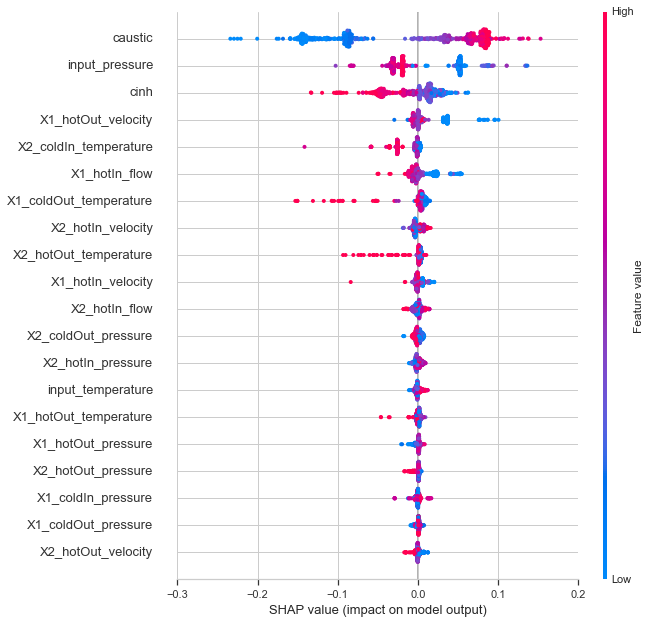

In [886]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_dmatrix)
shap_plot=shap.summary_plot(shap_values, x_train)


### Polynomial features


In [887]:
# perform a polynomial features transform of the covariates
trans = PolynomialFeatures(degree=2)
polynomial_features = trans.fit_transform(X)
polynomial_features =pd.DataFrame(polynomial_features)
polynomial_features.head()

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,1.0,0.011096,0.000813,149819.0,9.631200e+06,10.2,14.98,149819.0,9631600.0,10.1,...,5.338056e+09,7.048510e+11,9636877.8,72988938.00,9.307040e+13,1.272479e+09,9.637653e+09,17397.61,131768.100,998001.0000
1,1.0,0.009997,0.000855,149260.0,9.611800e+06,12.0,14.89,149234.0,9610500.0,12.2,...,4.999480e+09,6.818276e+11,8923223.4,1498988.40,9.298745e+13,1.216947e+09,2.044316e+08,15926.44,2675.440,449.4400
2,1.0,0.009006,0.000898,150586.0,9.514967e+06,12.5,15.06,150578.0,9598500.0,12.5,...,4.899720e+09,6.750887e+11,8840747.4,1467858.06,9.301445e+13,1.218088e+09,2.022431e+08,15951.69,2648.511,439.7409
3,1.0,0.008113,0.000944,149063.0,9.577600e+06,13.6,14.89,150588.0,9580000.0,12.4,...,4.803599e+09,6.687321e+11,8996178.4,1439527.16,9.309741e+13,1.252401e+09,2.004035e+08,16848.04,2695.946,431.3929
4,1.0,0.007307,0.000945,151495.0,9.561900e+06,14.9,15.17,151495.0,9566600.0,14.9,...,4.893142e+09,6.749012e+11,9072644.7,1466872.47,9.308776e+13,1.251372e+09,2.023228e+08,16822.09,2719.809,439.7409


In [888]:
# Test- Validation- Train Split
x_train_p = polynomial_features.iloc[range(0,801,1)]
x_val_p = polynomial_features.iloc[range(801,957,1)]
x_test_p = polynomial_features.iloc[range(957,1110,1)]

In [891]:
# Train and test set are converted to DMatrix objects,

train_dmatrix = xg.DMatrix(data = x_train_p, label = y_train_fe)
test_dmatrix = xg.DMatrix(data = x_test_p, label = y_test_fe)
val_dmatrix = xg.DMatrix(data = x_val_p, label = y_val_fe)
#xgboost= xg.XGBRegressor(objective ='reg:linear', n_estimators=10, max_depth=5, eta=0.1,learning_rate=0.6, gamma=2, reg_alpha=0.6, reg_lambda=0.9,seed = 571)


# Parameter dictionary specifying base learner
param = {'learning_rate': 0.6, "reg_lambda": 0.911, "reg_alpha":0.6}
  
model = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = model.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test_fe, pred))
print("RMSE : % f" %(rmse))
print("MSE : % f" %(mean_squared_error(y_test_fe, pred)))

RMSE :  0.030652
MSE :  0.000940



### 4.2.2. Decision Tree Regression

Then, max_ depth value, which is maximum depth of the tree, is decided which gives minimum "mean square error" at choosen test size.

In [892]:
#Tunning max_depth for decision tree

for i in range(1, 51, 1):
    model_dec_tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
    model_dec_tree.fit(x_train, y_train_fe)
    
    y_val_pred_dt = model_dec_tree.predict(x_val)
    y_train_pred_dt = model_dec_tree.predict(x_train)
    print('train MSE is', metrics.mean_squared_error(y_train_fe,y_train_pred_dt),", When max_depth is:",i)
    print('validation MSE is', metrics.mean_squared_error(y_val_fe,model_dec_tree.predict(x_val)),", When max_depth is:",i)  

train MSE is 0.00810956073614706 , When max_depth is: 1
validation MSE is 0.004754899290856142 , When max_depth is: 1
train MSE is 0.005329312560209425 , When max_depth is: 2
validation MSE is 0.004743513370051454 , When max_depth is: 2
train MSE is 0.004551090018878031 , When max_depth is: 3
validation MSE is 0.0051455120613833226 , When max_depth is: 3
train MSE is 0.004541055475267205 , When max_depth is: 4
validation MSE is 0.005170786389876931 , When max_depth is: 4
train MSE is 0.003934096940062529 , When max_depth is: 5
validation MSE is 0.004420467942473348 , When max_depth is: 5
train MSE is 0.0034047727154182354 , When max_depth is: 6
validation MSE is 0.003960675348281931 , When max_depth is: 6
train MSE is 0.0030938183084366585 , When max_depth is: 7
validation MSE is 0.004152155779429297 , When max_depth is: 7
train MSE is 0.003337590436914111 , When max_depth is: 8
validation MSE is 0.0049844492436470315 , When max_depth is: 8
train MSE is 0.0031849282668802137 , When max

As seen when max_depth is 10 MSE is smallest. val MSE is 0.0037 and train MSE is 0.0034.
When min_weight_fraction_leaf and ccp_alpha values different than 0, MSE increases, so they were taken as 0.

In [893]:
kf =KFold(n_splits=30, shuffle=True, random_state=571)

score = cross_val_score(DecisionTreeRegressor(max_depth=10, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0), 
                        x_test, y_test_fe, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
mse(score.mean())

Scores for each fold: [-1.68077790e-04 -7.19340365e-05 -1.21178683e-04 -1.42632215e-05
 -1.39847750e-04 -5.49281183e-03 -5.29296196e-05 -5.64009061e-05
 -1.02088584e-04 -3.02416995e-06 -1.18052521e-05 -7.51382900e-05
 -5.00406250e-05 -7.99255101e-04 -3.41292324e-05 -1.09858409e-05
 -1.00901504e-04 -2.84504001e-05 -3.11176467e-05 -8.88872647e-04
 -1.61523253e-04 -5.23098771e-05 -4.83720168e-05 -2.39972480e-03
 -6.91296132e-05 -7.88117594e-05 -1.21270592e-04 -5.84076758e-03
 -7.82067521e-05 -2.79622832e-05]
MSE= 0.02


In [894]:
model_dec_tree=DecisionTreeRegressor(max_depth=10, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
model_dec_tree.fit(x_train, y_train_fe)
y_test_pred_dt = model_dec_tree.predict(x_test)
y_train_pred_dt = model_dec_tree.predict(x_train)
print('train MSE is', metrics.mean_squared_error(y_train_fe,y_train_pred_dt))
print('test MSE is', metrics.mean_squared_error(y_test_fe,y_test_pred_dt))  


train MSE is 0.0035965551920150596
test MSE is 0.0032484219464917917


In [896]:
np.sqrt(mean_squared_error(y_test_fe, y_test_pred_dt))

0.05699492912963215

### Polynomail features

In [897]:
#Tunning max_depth for decision tree

for i in range(1, 20, 1):
    model_dec_tree_p = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
    model_dec_tree_p.fit(x_train_p, y_train_fe)
    
    y_val_pred_dt_p = model_dec_tree_p.predict(x_val_p)
    y_train_pred_dt_p = model_dec_tree_p.predict(x_train_p)
    print('train MSE is', metrics.mean_squared_error(y_train_fe,y_train_pred_dt_p),", When max_depth is:",i)
    print('validation MSE is', metrics.mean_squared_error(y_val_fe,y_val_pred_dt_p),", When max_depth is:",i)  

train MSE is 0.007705940436277305 , When max_depth is: 1
validation MSE is 0.004993533283791491 , When max_depth is: 1
train MSE is 0.0050105622447802756 , When max_depth is: 2
validation MSE is 0.004881141898142109 , When max_depth is: 2
train MSE is 0.0041573056009566525 , When max_depth is: 3
validation MSE is 0.00512570716918831 , When max_depth is: 3
train MSE is 0.0036328717117330815 , When max_depth is: 4
validation MSE is 0.0047063600108980825 , When max_depth is: 4
train MSE is 0.0031591289634449243 , When max_depth is: 5
validation MSE is 0.00352675679582912 , When max_depth is: 5
train MSE is 0.0033301953208413225 , When max_depth is: 6
validation MSE is 0.005031412440938309 , When max_depth is: 6
train MSE is 0.0032555083448633205 , When max_depth is: 7
validation MSE is 0.004853676723801744 , When max_depth is: 7
train MSE is 0.0032321191269295323 , When max_depth is: 8
validation MSE is 0.003502034276247997 , When max_depth is: 8
train MSE is 0.0032297815048227194 , When 

When max dept is 8 MSE for validation set and train set is smallest. 

In [898]:
kf =KFold(n_splits=10, shuffle=True, random_state=571)

score_p = cross_val_score(DecisionTreeRegressor(max_depth=8, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0), 
                        x_test_p, y_test_fe, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_p}')
mse(score_p.mean())

Scores for each fold: [-8.82601369e-05 -1.73722620e-03 -3.81956314e-05 -1.59965374e-05
 -2.71041815e-04 -2.81336305e-05 -6.81776282e-04 -8.85913837e-04
 -5.99924107e-05 -1.98595012e-03]
MSE= 0.02


In [899]:
model_dec_tree_p=DecisionTreeRegressor(max_depth=8, min_samples_leaf=12,  
                                        random_state = 571,
                                        splitter="random", min_weight_fraction_leaf=0, ccp_alpha=0)
model_dec_tree_p.fit(x_train_p, y_train_fe)
y_test_pred_dt_p = model_dec_tree_p.predict(x_test_p)
y_train_pred_dt_p = model_dec_tree_p.predict(x_train_p)
print('train MSE is', metrics.mean_squared_error(y_train_fe,y_train_pred_dt_p))
print('test MSE is', metrics.mean_squared_error(y_test_fe, y_test_pred_dt_p))  

train MSE is 0.003261637623732867
test MSE is 0.005103344203983049


In [900]:
np.sqrt(mean_squared_error(y_test_fe, y_test_pred_dt_p))

0.07143769455954643

In [381]:
dot_data_p = tree.export_graphviz(model_dec_tree_p, out_file=None, filled=True)
graph = graphviz.Source(dot_data_p, format="png") 

pydot_graph = pydotplus.graph_from_dot_data(dot_data_p)
pydot_graph.write_png('original_tree_fe.png')

True

## 5. Clustering

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster. 

Data sets usually contain numerical features that have been measured in different units. The values for all features must be transformed to the same scale. Now the data are ready to be clustered. 

In [901]:
data_drop= data.drop(['source',"ph_lab","fe_lab"], 1)
scaler = StandardScaler()
scaled_cl_pca = scaler.fit_transform(data_drop)
scaled_cl_pca

array([[-2.02441348e-01, -4.07341013e-01,  5.19478916e-02, ...,
         9.93897343e-02, -1.99079225e-01,  7.71745799e+00],
       [-4.21520410e-01,  1.98714418e-01,  4.31469346e-02, ...,
         9.71200069e-02, -2.50106546e-01, -1.06240213e-01],
       [-4.21520410e-01,  1.98714418e-01,  6.68582719e-03, ...,
         9.71200069e-02, -2.30971300e-01, -1.14247683e-01],
       ...,
       [-9.00929822e-01,  5.12259321e-01,  1.26610955e-01, ...,
         9.96058988e-02, -9.06461694e-02, -1.49800848e-01],
       [-9.00929822e-01,  5.12259321e-01,  4.66286319e-02, ...,
         1.00902886e-01,  2.09760938e-02, -1.50921893e-01],
       [-9.00929822e-01,  5.12259321e-01, -1.39738885e-01, ...,
         9.85250762e-02,  1.84084872e-03,  7.71745799e+00]])

In [902]:
pca = PCA()
pca_data = pca.fit_transform(scaled_cl_pca)
pca_data = pd.DataFrame(pca_data, columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16","pc17","pc18","pc19","pc20","pc21","pc22","pc23","pc24","pc25","pc26","pc27","pc28","pc29","pc30","pc31","pc32","pc33","pc34","pc35","pc36","pc37","pc38"])
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)
pca_data.head()

pca.explained variance ratio:
 [0.12698252 0.05933386 0.03220646 0.0298157  0.02945191 0.02884209
 0.02878279 0.02856415 0.02809932 0.02780613 0.02760993 0.02733757
 0.02703541 0.02685634 0.02655786 0.02619418 0.02599786 0.02570373
 0.02566138 0.02511329 0.02498554 0.02480105 0.0243759  0.0242489
 0.02404521 0.02310293 0.02280725 0.02250908 0.02092031 0.02000779
 0.01744922 0.01682666 0.01479683 0.01366726 0.01112301 0.00687129
 0.002775   0.00073428]


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38
0,2.872675,-1.447869,1.470567,1.046290,0.717904,-1.864950,0.649858,0.873138,-1.579129,1.784047,...,0.897459,0.178355,0.676537,0.104513,1.016960,0.120907,0.723845,-0.664347,-0.035270,0.042821
1,3.808142,0.050874,1.201790,0.064322,0.746575,4.663010,-1.195068,2.220590,0.722743,-0.884177,...,2.245856,1.195978,0.777428,2.764636,1.516028,0.113364,-0.093622,-0.571910,0.012341,0.003312
2,2.935652,-0.940615,0.130295,-0.201773,0.053038,-0.160633,0.135911,-0.219838,0.017689,0.106297,...,-0.036591,-0.228118,0.344801,0.264584,0.568697,0.124607,0.291200,-0.526144,0.014307,0.020017
3,2.815025,-1.656077,3.353622,-0.038835,0.805818,-0.507306,-0.114441,-0.965003,-0.933784,-0.137781,...,3.407867,0.648968,0.556245,-0.069208,-0.559440,0.289892,0.283333,-0.920192,0.020971,0.014691
4,2.929175,-0.960612,-0.048384,-0.210089,0.060535,-0.152020,0.166188,-0.226670,0.046429,0.126391,...,-0.038141,0.025434,0.146772,0.319622,0.622689,0.126658,0.295216,-0.598150,0.017386,0.021667


In [903]:
df=pca_data[["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15"]].copy()

### Choosing the Appropriate Number of Clusters

The elbow method and silhouette coefficient are often used as complementary evaluation techniques rather than one being preferred over the other. 

To perform the  <span style="background-color:yellow">Elbow method </span>  , run several k-means, increment k with each iteration, and record the SSE.



The <span style="background-color:yellow">Silhouette Coefficient</span> is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


Let conduct a k-means models for each k between the values 2 and 10. Then, obtain silhouette score for each k. Then, choose optimal value of k which has the highest average silhouette score.

In [904]:
for k in range(2, 11, 1):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=10,random_state=42)
    kmeans.fit(scaled_cl_pca)
    # Compute the silhouette scores for each algorithm
    kmeans_silhouette = silhouette_score(scaled_cl_pca, kmeans.labels_).round(3)
    print("kmeans silhouette score is", kmeans_silhouette, "when k is", k)

kmeans silhouette score is 0.141 when k is 2
kmeans silhouette score is 0.159 when k is 3
kmeans silhouette score is 0.165 when k is 4
kmeans silhouette score is 0.188 when k is 5
kmeans silhouette score is 0.194 when k is 6
kmeans silhouette score is 0.163 when k is 7
kmeans silhouette score is 0.171 when k is 8
kmeans silhouette score is 0.171 when k is 9
kmeans silhouette score is 0.183 when k is 10


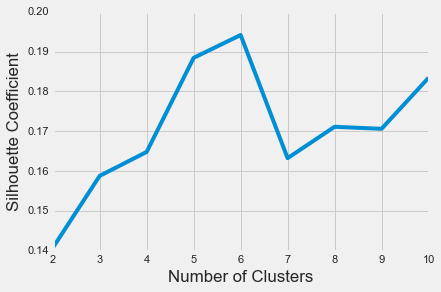

In [905]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=10,random_state=42)
    kmeans.fit(scaled_cl_pca)
    score = silhouette_score(scaled_cl_pca, kmeans.labels_)
    silhouette_coefficients.append(score)
  
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

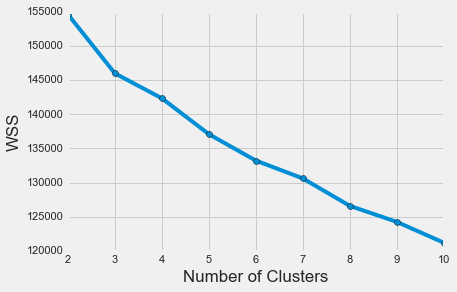

In [906]:
cluster_wss = []
for k in range(2, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=10,random_state=42)
    kmeans.fit(scaled_cl_pca)
    cluster_wss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), cluster_wss, marker = 'o')
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

In [907]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(data.source)
true_labels

array([0, 0, 0, ..., 1, 1, 1])

In [908]:
# k means
kmeans = KMeans(init="random", n_clusters=6, n_init=10, max_iter=10,random_state=42)
label_kmeans = kmeans.fit_predict(scaled_cl_pca)
label_kmeans

array([4, 4, 4, ..., 5, 5, 5], dtype=int32)

In [909]:
df["clusters"]=kmeans.fit_predict(scaled_cl_pca) #getting labels for k-means
df["true_labels"]=true_labels #getting true labels for true labels from the data

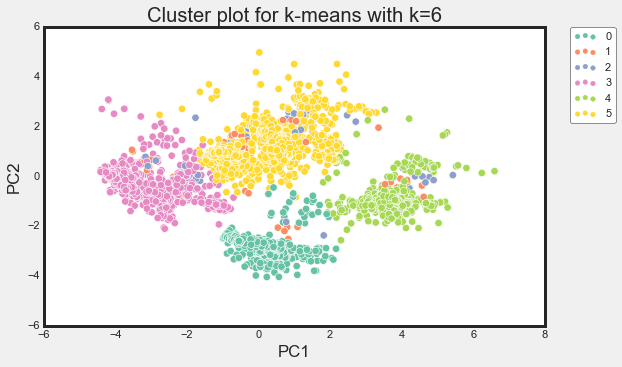

In [910]:
#plotting k-means:
plt.figure(figsize=(8,5))
sns.set_style('white')
g = sns.scatterplot(x="pc1", y="pc2", hue="clusters",s=55,
              data=df, palette='Set2', 
                   legend='full')
g.set(xlabel='PC1', ylabel='PC2', title="Cluster plot for k-means with k=6")
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

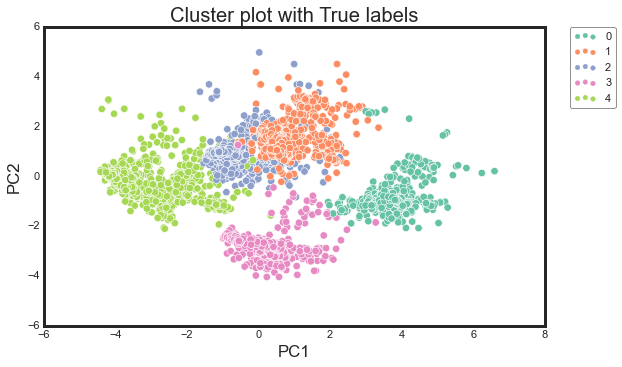

In [911]:
#plotting k-means:
plt.figure(figsize=(8,5))
sns.set_style('white')
g = sns.scatterplot(x="pc1", y="pc2", hue="true_labels",s=55,
              data=df, palette='Set2', 
                   legend='full')
g.set(xlabel='PC1', ylabel='PC2', title="Cluster plot with True labels")
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 6. Proposing New Method for cinh and caustic

Let first calculate the cost of cinh and caustic ratio given method in figure 2.
caustic=100
cinh=200

### old method;

- if 5.6≤ph_lab≤6.4 then rcaustic_next = rcaustic_current

- if ph_lab<5.6 then rcaustic_next = 1.1*rcaustic_current
- if ph_lab>6.4 then rcaustic_next = 0.9*rcaustic_current
- if 0.80≤fe_lab≤0.95 then rcinh_next = rcinh_current
- if fe_lab<0.80 then rcinh_next = 0.95*rcinh_current
- if fe_lab>0.95 then rcinh_next = 1.05*rcinh_current

In [912]:
import math
data_updated= data
starting_caustic=0.011096
starting_cinh=0.000813

data_updated["cinh_updated"]= "" # add empty column in a dataset
data_updated["caustic_updated"]= "" # add empty column in a dataset
#pd.to_numeric(data.caustic_updated)
data_updated.iloc[0,41]=starting_caustic
data_updated.iloc[0,42]=starting_cinh

## Update cinh

In [913]:
for i in range(0, 4437, 1):
    if math.isnan(data_updated.fe_lab[i]):
        data_updated.cinh_updated[i+1]=data_updated.cinh_updated[i]
    elif data_updated.fe_lab[i]>=0.80 and data_updated.fe_lab[i]<=0.95:
        data_updated.cinh_updated[i+1]=data_updated.cinh_updated[i]
        print("updated",data_updated.cinh_updated[i+1],"currentcase",data_updated.cinh_updated[i]," upperrow"," fe value",data_updated.fe_lab[i])
    elif data_updated.fe_lab[i]<0.80:
        data_updated.cinh_updated[i+1]=data_updated.cinh_updated[i]*0.1
        print("updated",data_updated.cinh_updated[i+1],"currentcase",data_updated.cinh_updated[i]," middlerow"," fe value",data_updated.fe_lab[i])
    elif data_updated.fe_lab[i]>0.95:
        data_updated.cinh_updated[i+1]=data_updated.cinh_updated[i]*1.01
        print("updated",data_updated.cinh_updated[i+1],"currentcase",data_updated.cinh_updated[i]," bottomrow"," fe value",data_updated.fe_lab[i])

updated 0.01120696 currentcase 0.011096  bottomrow  fe value 1.27
updated 0.0113190296 currentcase 0.01120696  bottomrow  fe value 1.116
updated 0.011432219896 currentcase 0.0113190296  bottomrow  fe value 1.006
updated 0.011432219896 currentcase 0.011432219896  upperrow  fe value 0.914
updated 0.011432219896 currentcase 0.011432219896  upperrow  fe value 0.87
updated 0.011432219896 currentcase 0.011432219896  upperrow  fe value 0.845
updated 0.0011432219896 currentcase 0.011432219896  middlerow  fe value 0.794
updated 0.0011432219896 currentcase 0.0011432219896  upperrow  fe value 0.836
updated 0.0011432219896 currentcase 0.0011432219896  upperrow  fe value 0.836
updated 0.0011432219896 currentcase 0.0011432219896  upperrow  fe value 0.845
updated 0.0011432219896 currentcase 0.0011432219896  upperrow  fe value 0.836
updated 0.0011432219896 currentcase 0.0011432219896  upperrow  fe value 0.836
updated 0.0011432219896 currentcase 0.0011432219896  upperrow  fe value 0.845
updated 0.00114

updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.931
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.925
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.928
updated 1.225688710356273e-10 currentcase 1.225688710356273e-10  upperrow  fe value 0.919
updated 1.

updated 1.3272452390219245e-18 currentcase 1.3141041970514103e-18  bottomrow  fe value 0.976
updated 1.3405176914121439e-18 currentcase 1.3272452390219245e-18  bottomrow  fe value 0.977
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 0.93
updated 1.3405176914121439e-18 currentcase 1.3405176914121439e-18  upperrow  fe value 

updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe value 0.848
updated 1.4955731564533936e-23 currentcase 1.4955731564533936e-23  upperrow  fe 

updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.802
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.844
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.844
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.844
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.844
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.844
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.853
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.853
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.844
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.881
updated 1.652043198789492e-28 currentcase 1.652043198789492e-28  upperrow  fe value 0.838
updated 1.

updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.927
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.917
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.93
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe value 0.934
updated 1.7021017597560127e-34 currentcase 1.7021017597560127e-34  upperrow  fe v

updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.872
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.872
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.872
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.872
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.879
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.879
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.887
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.887
updated 1.80681531635443e-38 currentcase 1.80681531635443e-38  upperrow  fe value 0.887
updated 1.80681531635443e-39 currentcase 1.80681531635443e-38  middlerow  fe value 0.558
updated 1.8068153163544303e-40 currentcase 1.80681531635443e-39  middlerow  fe value 0.619
updated 1.8068153163544303e-

updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.248971679907239e-53 currentcase 2.248971679907239e-53  upperrow  fe value 0.864
updated 2.271461396706311e-53 currentcase 2.248971679907239e-53  bottomrow  fe value 1.193
updated 2

updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.883
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.9
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.9
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.907
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.883
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.907
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.921
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.907
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.893
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe value 0.893
updated 2.9421247182885345e-59 currentcase 2.9421247182885345e-59  upperrow  fe valu

updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.891
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.884
updated 3.

updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868
updated 3.249936059540723e-63 currentcase 3.249936059540723e-63  upperrow  fe value 0.868


## Update caustic

In [914]:
for i in range(0, 4437, 1):
    if math.isnan(data_updated.ph_lab[i]):
        data_updated.caustic_updated[i+1]=data_updated.caustic_updated[i]
    elif data_updated.ph_lab[i]>=5.6 and data_updated.ph_lab[i]<=6.4:
        data_updated.caustic_updated[i+1]=data_updated.caustic_updated[i]
        print("updated",data_updated.caustic_updated[i+1],"currentcase",data_updated.caustic_updated[i]," upperrow"," ph value",data_updated.ph_lab[i])
    elif data_updated.ph_lab[i]<5.6:
        data_updated.caustic_updated[i+1]=data_updated.caustic_updated[i]*1.1
        print("updated",data_updated.caustic_updated[i+1],"currentcase",data_updated.caustic_updated[i]," middlerow"," ph value",data_updated.ph_lab[i])
    elif data_updated.ph_lab[i]>6.4:
        data_updated.caustic_updated[i+1]=data_updated.caustic_updated[i]*0.9
        print("updated",data_updated.caustic_updated[i+1],"currentcase",data_updated.caustic_updated[i]," bottomrow"," ph value",data_updated.ph_lab[i])


updated 0.0007317000000000001 currentcase 0.000813  bottomrow  ph value 8.36
updated 0.00065853 currentcase 0.0007317000000000001  bottomrow  ph value 7.73
updated 0.0005926770000000001 currentcase 0.00065853  bottomrow  ph value 7.32
updated 0.0005334093000000001 currentcase 0.0005926770000000001  bottomrow  ph value 6.99
updated 0.0004800683700000001 currentcase 0.0005334093000000001  bottomrow  ph value 6.66
updated 0.0004320615330000001 currentcase 0.0004800683700000001  bottomrow  ph value 6.47
updated 0.0004320615330000001 currentcase 0.0004320615330000001  upperrow  ph value 6.08
updated 0.0004320615330000001 currentcase 0.0004320615330000001  upperrow  ph value 6.08
updated 0.0004320615330000001 currentcase 0.0004320615330000001  upperrow  ph value 6.08
updated 0.0004320615330000001 currentcase 0.0004320615330000001  upperrow  ph value 6.15
updated 0.0004320615330000001 currentcase 0.0004320615330000001  upperrow  ph value 6.08
updated 0.0004320615330000001 currentcase 0.000432

updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.99
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.85
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.93
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.62
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.62
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.62
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.64
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.62
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.66
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.66
updated 0.0013424342339002108 currentcase 0.0013424342339002108  upperrow  ph value 5.68
updated 0.00134243423

updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.2
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.2
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.31
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.37
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.31
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.25
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.14
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.14
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.09
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.09
updated 0.0005607104859991096 currentcase 0.0005607104859991096  upperrow  ph value 6.04
updated 0.0005607104859

updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.0005894090131337372 currentcase 0.0005894090131337372  upperrow  ph value 6.14
updated 0.00058940901

updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.3
updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.3
updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.3
updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.3
updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.36
updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.36
updated 0.0004845917693879831 currentcase 0.0004845917693879831  upperrow  ph value 6.3
updated 0.0004361325924491848 currentcase 0.0004845917693879831  bottomrow  ph value 6.58
updated 0.0004361325924491848 currentcase 0.0004361325924491848  upperrow  ph value 6.25
updated 0.0004361325924491848 currentcase 0.0004361325924491848  upperrow  ph value 6.4
updated 0.00039251933320426634 currentcase 0.0004361325924491848  bottomrow  ph value 6.48
updated 0.00039251933320

updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.74
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.8
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.72
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.72
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.7
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.68
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.64
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.68
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.68
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.68
updated 0.0012318938137398762 currentcase 0.0012318938137398762  upperrow  ph value 5.7
updated 0.00123189381373

updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.0005145397529043706 currentcase 0.0005145397529043706  upperrow  ph value 5.74
updated 0.00051453975

updated 0.0012753553100361141 currentcase 0.001159413918214649  middlerow  ph value 5.59
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 5.86
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 5.95
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 5.78
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 5.93
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 5.86
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 6.08
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 6.11
updated 0.0012753553100361141 currentcase 0.0012753553100361141  upperrow  ph value 6.11
updated 0.0011478197790325028 currentcase 0.0012753553100361141  bottomrow  ph value 7.29
updated 0.0010330378011292525 currentcase 0.0011478197790325028  bottomrow  ph value 6.96
updated 0.000929734

updated 0.0011418743968473197 currentcase 0.0011418743968473197  upperrow  ph value 6.12
updated 0.0011418743968473197 currentcase 0.0011418743968473197  upperrow  ph value 6.09
updated 0.0011418743968473197 currentcase 0.0011418743968473197  upperrow  ph value 6.12
updated 0.0011418743968473197 currentcase 0.0011418743968473197  upperrow  ph value 6.07
updated 0.0011418743968473197 currentcase 0.0011418743968473197  upperrow  ph value 5.8
updated 0.001256061836532052 currentcase 0.0011418743968473197  middlerow  ph value 5.58
updated 0.001256061836532052 currentcase 0.001256061836532052  upperrow  ph value 5.82
updated 0.001256061836532052 currentcase 0.001256061836532052  upperrow  ph value 5.86
updated 0.001256061836532052 currentcase 0.001256061836532052  upperrow  ph value 6.01
updated 0.001256061836532052 currentcase 0.001256061836532052  upperrow  ph value 6.13
updated 0.001256061836532052 currentcase 0.001256061836532052  upperrow  ph value 6.13
updated 0.001256061836532052 cur

updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.27
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.27
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.27
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.27
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.0006159530837866348 currentcase 0.0006159530837866348  upperrow  ph value 6.32
updated 0.00061595308

updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.0005543577754079713 currentcase 0.0005543577754079713  upperrow  ph value 6.16
updated 0.00055435777

In [915]:
data_updated.head()

,caustic,cinh,input_flow,input_pressure,input_temperature,input_velocity,X1_coldIn_flow,X1_coldIn_pressure,X1_coldIn_temperature,X1_coldIn_velocity,...,X2_coldOut_velocity,X2_hotOut_flow,X2_hotOut_pressure,X2_hotOut_temperature,X2_hotOut_velocity,ph_lab,fe_lab,source,cinh_updated,caustic_updated
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01 08:00:00,0.011096,0.000813,149819.0,9631200.0,10.2,14.98,149819.0,9631600.0,10.1,15.130000,...,15.08,73062.0,9647300.0,131.9,999.00,8.36,1.270,A,0.011096,0.000813
2021-02-01 08:30:00,0.009997,0.000855,149728.0,9634800.0,10.8,14.98,149707.0,9632600.0,10.8,15.090000,...,15.01,73238.0,9645200.0,130.3,21.95,NaN,NaN,A,0.011207,0.000732
2021-02-01 09:00:00,0.009997,0.000855,149351.0,9613100.0,11.0,14.94,149345.0,9612800.0,11.0,15.060000,...,15.00,69922.0,9645200.0,130.9,20.95,NaN,NaN,A,0.011207,0.000732
2021-02-01 09:30:00,0.009997,0.000855,150285.0,9611400.0,-40.0,15.03,150260.0,9608600.0,11.4,15.093333,...,15.11,70648.0,9643900.0,127.4,21.18,NaN,NaN,A,0.011207,0.000732
2021-02-01 10:00:00,0.009997,0.000855,149260.0,9611800.0,12.0,14.89,149234.0,9610500.0,12.2,15.070000,...,15.04,70707.0,9643000.0,126.2,21.20,7.73,1.116,A,0.011207,0.000732


In [726]:
# Better model to predict pH level
svm = SVR(kernel = 'rbf', gamma="scale", epsilon=0.05,C=500)
svm.fit(x_train, y_train)
pred_ph = svm.predict(x_test)
pred_ph

array([ 6.05650169,  6.00090322,  6.1014336 ,  6.07568847,  6.06953086,
        6.10551338,  6.07655944,  5.97257228,  5.12553701,  5.57177926,
        5.0197548 ,  5.31636003,  5.96403211,  5.66239261,  5.35825217,
        5.41606975,  5.39921637,  5.51877524,  5.38058469,  4.92483579,
        5.41320747,  5.46425577,  6.13663918,  6.59506908,  5.7145566 ,
        6.2563179 ,  5.40340104,  6.25061294,  6.25981987,  6.24188509,
        4.48273231,  5.53652735,  5.92657664,  6.24394972,  5.69099276,
        6.30642552,  6.25189112,  5.75734104,  6.33004174,  6.27462964,
        6.24709904,  6.3339385 ,  5.77630117,  6.26852776,  6.28245991,
        6.25995544,  6.06508192,  6.49407257,  6.30050988,  6.29404405,
       10.43109655,  6.27501716,  6.26891046,  6.25815235,  6.19828374,
        5.18790251,  6.30459449,  4.44885914,  6.00608373,  6.30153936,
        5.36159487,  6.11683902,  6.31762495,  6.08875754,  6.34057371,
        6.08010055,  6.33924041,  6.29882548,  6.30830789,  5.92

In [757]:
for i in range(0,153):
    if pred_ph[i]>=5.6 and pred_ph[i]<=6.4:
        print(pred_ph[i])

6.056501688659762
6.0009032224359204
6.101433600427815
6.075688465363084
6.069530858960872
6.105513384357761
6.076559444718595
5.972572280497173
5.9640321068666795
5.66239260616661
6.136639181170492
5.7145566040577735
6.2563178970298
6.250612935366218
6.259819870009193
6.241885089061623
5.926576641829205
6.243949719957034
5.690992764928326
6.306425522975229
6.2518911204402245
5.7573410390099315
6.3300417363003705
6.274629644921146
6.247099043698362
6.333938501244558
5.7763011683853565
6.268527758382857
6.282459909189396
6.25995544255282
6.065081918144291
6.300509876435041
6.2940440494907195
6.275017162651818
6.2689104559743045
6.2581523491022155
6.198283743232001
6.304594489337444
6.006083734393578
6.301539361854492
6.116839019153301
6.317624950241407
6.0887575425891045
6.340573711552378
6.080100545517685
6.339240411413766
6.298825479457958
6.308307889664502
5.923459026304416
6.018758962939882
6.096066244775739
6.0752921564855
6.123453707185161
6.110679863972945
6.077696291911107
6.191

In [916]:
data_updated2= data_updated.drop(['caustic',"cinh"], 1)
pH_fe_data_updated = data_updated2.dropna()
X_updated= pH_fe_data_updated.drop(['ph_lab',"source","fe_lab"], 1)
y= pH_fe_data_updated["ph_lab"]
y_fe_ud= pH_fe_data_updated["fe_lab"]
y_test_updated_fe = y_fe_ud[957:1110]

## Updated predictions for pH

In [810]:
#Scaling independent variables
scaler = StandardScaler()
scaled_features_updated = scaler.fit_transform(X_updated)
scaled_features_updated =pd.DataFrame(scaled_features_updated, columns=["input_flow","input_pressure","input_temperature","input_velocity","X1_coldIn_flow","X1_coldIn_pressure","X1_coldIn_temperature","X1_coldIn_velocity","X1_hotIn_flow","X1_hotIn_pressure","X1_hotIn_temperature","X1_hotIn_velocity","X1_coldOut_flow","X1_coldOut_pressure","X1_coldOut_temperature","X1_coldOut_velocity","X1_hotOut_flow","X1_hotOut_pressure","X1_hotOut_temperature","X1_hotOut_velocity","X2_coldIn_flow","X2_coldIn_pressure","X2_coldIn_temperature","X2_coldIn_velocity","X2_hotIn_flow","X2_hotIn_pressure","X2_hotIn_temperature","X2_hotIn_velocity","X2_coldOut_flow","X2_coldOut_pressure","X2_coldOut_temperature","X2_coldOut_velocity","X2_hotOut_flow","X2_hotOut_pressure","X2_hotOut_temperature","X2_hotOut_velocity","caustic","cinh"])

In [771]:
x_test_updated = scaled_features_updated.iloc[range(957,1110,1)]
y_test = y[957:1110]

In [772]:
pred_ph_updated = svm.predict(x_test_updated)
pred_ph_updated

array([ 9.07818891,  5.68001064,  6.09188661,  8.62136714,  8.00821707,
        8.50659646,  8.48217116,  8.37507069,  2.15626618,  6.63189619,
        7.01707321,  7.46616464,  6.74885158,  6.18092876,  7.13931448,
        7.44219721,  7.76383244,  7.52460235,  7.93903576,  2.39812672,
        7.66707892,  7.62582904,  7.14712796,  8.76187902,  7.08441108,
        8.80320442,  8.15116823,  8.95128984,  9.07642531,  8.95226431,
        7.55726274, 10.55249371,  6.65853629,  8.28664688,  4.27304801,
        8.54323161,  7.72989426,  5.86654992,  8.5587835 ,  9.11670061,
        7.13662002,  8.81549719,  6.96038342,  8.53181378,  8.96749343,
        9.24820473,  6.04009957,  4.78805726,  8.31233194,  8.88929836,
        8.51538859,  8.97523567,  8.68577362,  8.90671204,  7.8801518 ,
        6.33052911,  8.01693141,  7.17191212,  6.19890297,  8.41211764,
        7.05114521,  1.48220869,  8.41956106,  2.49709499,  8.26876592,
        6.25187852,  8.66801739,  8.53755146,  8.87826371,  5.84

In [773]:
for i in range(0,153):
    if pred_ph_updated[i]>=5.6 and pred_ph_updated[i]<=6.4:
        print(pred_ph_updated[i])

5.680010640580716
6.091886605474532
6.180928758396143
5.86654992350964
6.040099567010093
6.330529106028753
6.198902972982045
6.251878523644426
5.843716168454274
5.717255071321719
6.322495605018166
5.6884777460903395
6.006427608229015
5.6866644008433855
5.849038806164344


In [779]:
# Better model to predict iron value
import xgboost as xg
train_dmatrix = xg.DMatrix(data = x_train_p, label = y_train_fe)
test_dmatrix = xg.DMatrix(data = x_test_p, label = y_test_fe)
val_dmatrix = xg.DMatrix(data = x_val_p, label = y_val_fe)

param = {'learning_rate': 0.6, "reg_lambda": 0.911, "reg_alpha":0.6}
  
model = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred_fe = model.predict(test_dmatrix)
pred_fe

array([0.82986784, 0.8402764 , 0.84921646, 0.84921646, 0.8395695 ,
       0.8589459 , 0.84921646, 0.8589459 , 0.8200386 , 0.8384123 ,
       0.75502414, 0.8810201 , 0.8790377 , 0.8722935 , 0.8953181 ,
       0.85176176, 0.90404475, 0.8858616 , 0.90404475, 0.91209656,
       0.90690976, 0.8953181 , 0.98146063, 0.955815  , 0.83582264,
       0.8589459 , 0.86305875, 0.85000587, 0.8522017 , 0.8522017 ,
       0.84921646, 0.8589459 , 0.86324096, 0.7650916 , 0.84529805,
       0.8522017 , 0.84921646, 0.83380413, 0.8522017 , 0.8522017 ,
       0.84921646, 0.8591874 , 0.88484114, 0.8525378 , 0.88670033,
       0.86324096, 0.86593163, 0.8810837 , 0.8569916 , 0.86324096,
       0.8522017 , 0.8589459 , 0.84921646, 0.8522017 , 0.8522017 ,
       0.84921646, 0.84921646, 0.84921646, 0.8591874 , 0.8589459 ,
       0.7718358 , 0.84921646, 0.84921646, 0.8550275 , 0.8402764 ,
       0.8388079 , 0.868126  , 0.8570867 , 0.8570867 , 0.8570867 ,
       0.8579011 , 0.8529633 , 0.8529633 , 0.8529633 , 0.85296

## Updated predictions for cinh

In [817]:
# perform a polynomial features transform of the covariates
trans = PolynomialFeatures(degree=2)
polynomial_features_updated = trans.fit_transform(X_updated)
polynomial_features_updated =pd.DataFrame(polynomial_features_updated)

In [818]:
# Test- Validation- Train Split
x_train_p_updated = polynomial_features_updated.iloc[range(0,801,1)]
x_val_p_updated = polynomial_features_updated.iloc[range(801,957,1)]
x_test_p_updated = polynomial_features_updated.iloc[range(957,1110,1)]

In [819]:
# Better model to predict iron value
import xgboost as xg
train_dmatrix = xg.DMatrix(data = x_train_p_updated, label = y_train_fe)
test_dmatrix_updated= xg.DMatrix(data = x_test_p_updated, label = y_test_updated_fe)
val_dmatrix = xg.DMatrix(data = x_val_p_updated, label = y_val_fe)

param = {'learning_rate': 0.6, "reg_lambda": 0.911, "reg_alpha":0.6}
  
model = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred_fe_ud = model.predict(test_dmatrix_updated)
pred_fe_ud

array([0.8691573 , 0.7945817 , 0.86936104, 0.8593914 , 0.86936104,
       0.8797396 , 0.8797396 , 0.8719101 , 0.865318  , 0.8878265 ,
       0.85037696, 0.8097651 , 0.8886556 , 0.8414925 , 0.92370754,
       0.9011543 , 0.9145252 , 0.91603035, 0.899294  , 0.92302614,
       0.88152856, 0.9011543 , 0.9011486 , 0.9089895 , 0.861924  ,
       0.8669128 , 0.87434983, 0.8593914 , 0.8640692 , 0.8593914 ,
       0.8667885 , 0.8646832 , 0.8797396 , 0.78011507, 0.8718987 ,
       0.86723226, 0.87960273, 0.86936104, 0.86723226, 0.8719101 ,
       0.80201876, 0.87232035, 0.8644795 , 0.87444913, 0.86723226,
       0.8670121 , 0.8646832 , 0.8697713 , 0.86936104, 0.8566322 ,
       0.8719101 , 0.8593914 , 0.86723226, 0.87506175, 0.86558425,
       0.86723226, 0.8797396 , 0.85111815, 0.8236221 , 0.8672209 ,
       0.767164  , 0.86936104, 0.8646832 , 0.8566322 , 0.87444913,
       0.8593914 , 0.8464403 , 0.8769982 , 0.8506426 , 0.85640997,
       0.8436811 , 0.8464403 , 0.8590145 , 0.8489729 , 0.86447

## calculate cost of new method and old method

In [829]:
cinh_caustic= data.iloc[range(1,4439,4), range(0,2,1)]
cinh_caustic

,caustic,cinh
date,,
2021-02-01 08:30:00,0.009997,0.000855
2021-02-01 10:30:00,0.009006,0.000898
2021-02-01 12:30:00,0.008113,0.000944
2021-02-01 14:30:00,0.007307,0.000945
2021-02-01 16:30:00,0.006581,0.000946
...,...,...
2021-05-04 10:30:00,0.007593,0.000876
2021-05-04 12:30:00,0.007593,0.000876
2021-05-04 14:30:00,0.007593,0.000876


In [831]:
#old method
sum(cinh_caustic.cinh)*100

93.37510884009917

In [832]:
sum(cinh_caustic.caustic)*200

2688.1786164663995

In [834]:
cinh_caustic_ud= data_updated.iloc[range(1,4439,4), range(41,43,1)]
cinh_caustic_ud

,cinh_updated,caustic_updated
date,,
2021-02-01 08:30:00,0.011207,0.000732
2021-02-01 10:30:00,0.011319,0.000659
2021-02-01 12:30:00,0.011432,0.000593
2021-02-01 14:30:00,0.011432,0.000533
2021-02-01 16:30:00,0.011432,0.00048
...,...,...
2021-05-04 10:30:00,0.0,0.000554
2021-05-04 12:30:00,0.0,0.000554
2021-05-04 14:30:00,0.0,0.000554


In [837]:
#new method
sum(cinh_caustic_ud.cinh_updated)*100

10.725183576129778

In [839]:
sum(cinh_caustic_ud.caustic_updated)*200

197.58246572730815